# Consumer Complaint Classification

# Field descriptions:
- **Date received**: The date the CFPB received the complaint. 
- **Product**: The type of product the consumer identified in the complaint. For example, "Student loan"
- **Sub-product**:The type of sub-product the consumer identified in the complaint. For example,"Private student loan".
- **Issue**: The issue the consumer identified in the complaint. For example, "Struggling to pay your loan" 
- **Sub-issue**: More detailed breakdown of the issue For example, “Deposits and withdrawals”
- **Consumer complaint narrative**: The consumer's written complaint.
- **Company public response**: The company's response to the complaint (if provided).
- **Company**: The complaint is about this company. For example, “ABC Bank.”
- **State**: The state of the mailing address provided by the consumer.
- **ZIP code**: The mailing ZIP code provided by the consumer. 
- **Tags**: Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.
- **Consumer consent provided?**: Whether the consumer consented to the public release of their complaint.
- **Submitted via**: How the complaint was submitted to the CFPB. For example, "Web" or "Phone"
- **Date sent to company**: The date the CFPB sent the complaint to the company.
- **Company response to consumer**: The company's response to the consumer.
- **Timely response?**: Whether the company responded within the CFPB's timeframe.
- **Consumer disputed?**: Whether the consumer disputed the company’s response
- **Complaint ID**: Unique identifier for the complaint.

# Step 1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display, Markdown

# Step 2:  Loading the data set

In [2]:
df = pd.read_csv('student_vehicle_loan.csv',parse_dates=['Date received','Date sent to company'])
# Parsing dates to ensure 'Date received' and 'Date sent to company' are treated as datetime objects
df.head()

Date received                Product                     Sub-product  \
0    2021-07-23  Vehicle loan or lease                           Lease   
1    2024-01-12           Student loan  Federal student loan servicing   
2    2024-03-22           Student loan            Private student loan   
3    2022-05-05  Vehicle loan or lease                            Loan   
4    2024-03-06           Student loan  Federal student loan servicing   

                                  Issue  \
0               Getting a loan or lease   
1  Dealing with your lender or servicer   
2  Dealing with your lender or servicer   
3           Struggling to pay your loan   
4         Struggling to repay your loan   

                                           Sub-issue  \
0                                      Credit denial   
1        Trouble with how payments are being handled   
2           Received bad information about your loan   
3  Problem after you declared or threatened to de...   
4  Problem with forgiveness, cancellation, or dis...   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  In XX/XX/2020, I filed bankruptcy. Capital One...   
4  In accordance with the Fair Credit Reporting a...   

                             Company public response  \
0                                                NaN   
1  Company believes it acted appropriately as aut...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                  Company State ZIP code Tags  \
0  Volvo Car Financial Services U.S., LLC    MO    65714  NaN   
1                                  MOHELA    PA    15227  NaN   
2                               AES/PHEAA    IL    60616  NaN   
3       CAPITAL ONE FINANCIAL CORPORATION    IL    60644  NaN   
4   Maximus Education, LLC dba Aidvantage    NE    68506  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0       Consent not provided           Web           2021-07-23   
1       Consent not provided           Web           2024-01-12   
2                        NaN         Phone           2024-05-01   
3           Consent provided           Web           2022-05-05   
4           Consent provided           Web           2024-03-07   

  Company response to consumer Timely response?  Consumer disputed?  \
0      Closed with explanation              Yes                 NaN   
1      Closed with explanation              Yes                 NaN   
2      Closed with explanation              Yes                 NaN   
3      Closed with explanation              Yes                 NaN   
4      Closed with explanation              Yes                 NaN   

   Complaint ID  
0       4567067  
1       8195086  
2       8609478  
3       5543271  
4       8472850

# Step 3: EDA

In [3]:
print(df.shape)
text = '**Observation**: The dataset contains 60,185 records and 18 columns'
display(Markdown(text))

(60185, 18)


**Observation**: The dataset contains 60,185 records and 18 columns

In [4]:
print(df.info())
text = """**Observations:** 
1. Most columns, including Product, Sub-product, Issue, Company, etc., are of type object, indicating categorical data.
2. The 'Consumer complaint narrative' column has a substantial number of missing values, with 27,674 out of 60,185 entries missing. This indicates that many consumers did not provide a narrative with their complaint.
3. The 'Consumer disputed?' column contains only null values, which is expected as the Bureau discontinued the consumer dispute option on April 24, 2017.
"""
display(Markdown(text))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60185 entries, 0 to 60184
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 60185 non-null  datetime64[ns]
 1   Product                       60185 non-null  object        
 2   Sub-product                   60185 non-null  object        
 3   Issue                         60185 non-null  object        
 4   Sub-issue                     60155 non-null  object        
 5   Consumer complaint narrative  32511 non-null  object        
 6   Company public response       23280 non-null  object        
 7   Company                       60185 non-null  object        
 8   State                         60043 non-null  object        
 9   ZIP code                      60150 non-null  object        
 10  Tags                          8194 non-null   object        
 11  Consumer consent provided?  

**Observations:** 
1. Most columns, including Product, Sub-product, Issue, Company, etc., are of type object, indicating categorical data.
2. The 'Consumer complaint narrative' column has a substantial number of missing values, with 27,674 out of 60,185 entries missing. This indicates that many consumers did not provide a narrative with their complaint.
3. The 'Consumer disputed?' column contains only null values, which is expected as the Bureau discontinued the consumer dispute option on April 24, 2017.


### Duplicate 'Consumer complaint narrative' entries

In [5]:
duplicate_rows = df[(~df['Consumer complaint narrative'].isnull())].duplicated(['Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative','Company'],keep=False)
duplicate_rows = duplicate_rows.reindex(df.index, fill_value=False)
duplicate_df = df[duplicate_rows]
duplicate_df

Date received                Product                     Sub-product  \
6690     2024-03-13           Student loan  Federal student loan servicing   
15277    2021-09-05  Vehicle loan or lease                            Loan   
15542    2021-11-16  Vehicle loan or lease                           Lease   
16894    2021-11-12           Student loan  Federal student loan servicing   
17974    2023-11-21           Student loan  Federal student loan servicing   
18744    2023-07-25  Vehicle loan or lease                            Loan   
19356    2022-12-25  Vehicle loan or lease                            Loan   
20898    2021-09-20  Vehicle loan or lease                            Loan   
23988    2021-11-24  Vehicle loan or lease                            Loan   
26632    2022-12-25  Vehicle loan or lease                            Loan   
27145    2021-10-12  Vehicle loan or lease                            Loan   
28744    2021-09-13  Vehicle loan or lease                            Loan   
29493    2021-09-24  Vehicle loan or lease                            Loan   
33155    2021-07-24  Vehicle loan or lease                            Loan   
33961    2023-05-13           Student loan            Private student loan   
35788    2021-11-11           Student loan  Federal student loan servicing   
39070    2021-12-08  Vehicle loan or lease                            Loan   
39599    2023-06-21  Vehicle loan or lease                            Loan   
40193    2021-09-17  Vehicle loan or lease                            Loan   
41583    2021-11-11  Vehicle loan or lease                            Loan   
42170    2021-07-27  Vehicle loan or lease                            Loan   
42626    2023-05-13           Student loan            Private student loan   
43269    2021-11-24  Vehicle loan or lease                            Loan   
43843    2021-12-21           Student loan  Federal student loan servicing   
44230    2021-12-20  Vehicle loan or lease                            Loan   
44389    2021-11-17           Student loan  Federal student loan servicing   
46914    2021-10-14  Vehicle loan or lease                            Loan   
47059    2021-10-08  Vehicle loan or lease                            Loan   
47315    2022-02-17  Vehicle loan or lease                            Loan   
47682    2021-09-08  Vehicle loan or lease                            Loan   
48174    2021-09-02  Vehicle loan or lease                            Loan   
48316    2021-11-06  Vehicle loan or lease                            Loan   
49032    2021-12-05  Vehicle loan or lease                            Loan   
49041    2021-11-02           Student loan            Private student loan   
49158    2021-11-05  Vehicle loan or lease                            Loan   
49166    2022-06-01  Vehicle loan or lease                            Loan   
49455    2022-06-01  Vehicle loan or lease                            Loan   
49600    2021-09-21  Vehicle loan or lease                           Lease   
49681    2023-06-21  Vehicle loan or lease                            Loan   
50751    2021-09-02  Vehicle loan or lease                            Loan   
52114    2021-12-21  Vehicle loan or lease                            Loan   
52860    2021-11-02           Student loan            Private student loan   
54112    2023-07-25  Vehicle loan or lease                            Loan   
55453    2021-09-01  Vehicle loan or lease                            Loan   
55712    2021-08-27           Student loan  Federal student loan servicing   

                                                   Issue  \
6690                Dealing with your lender or servicer   
15277  Problem with a credit reporting company's inve...   
15542  Problem with a credit reporting company's inve...   
16894  Problem with a credit reporting company's inve...   
17974               Dealing with your lender or servicer   
18744  Problem with a credit reporting company's inve... 

In [6]:
duplicate_df.shape

(45, 18)

In [7]:
duplicate_df[duplicate_df.duplicated(subset=['Date received', 'Consumer complaint narrative'], keep=False)].loc[[19356,26632]]

Date received                Product Sub-product  \
19356    2022-12-25  Vehicle loan or lease        Loan   
26632    2022-12-25  Vehicle loan or lease        Loan   

                                      Issue  \
19356  Incorrect information on your report   
26632  Incorrect information on your report   

                                 Sub-issue  \
19356  Information belongs to someone else   
26632  Information belongs to someone else   

                            Consumer complaint narrative  \
19356  I AM WRITING TO DELETE THE FOLLOWING INFORMATI...   
26632  I AM WRITING TO DELETE THE FOLLOWING INFORMATI...   

                                 Company public response  \
19356  Company has responded to the consumer and the ...   
26632  Company has responded to the consumer and the ...   

                                      Company State ZIP code Tags  \
19356  TRANSUNION INTERMEDIATE HOLDINGS, INC.    PA    19138  NaN   
26632  TRANSUNION INTERMEDIATE HOLDINGS, INC.    PA    19138  NaN   

      Consumer consent provided? Submitted via Date sent to company  \
19356           Consent provided           Web           2022-12-25   
26632           Consent provided           Web           2022-12-25   

          Company response to consumer Timely response?  Consumer disputed?  \
19356  Closed with non-monetary relief              Yes                 NaN   
26632  Closed with non-monetary relief              Yes                 NaN   

       Complaint ID  
19356       6358790  
26632       6358778

In [8]:
df[duplicate_rows]['Consumer complaint narrative'].value_counts()

Consumer complaint narrative
I was looking through my report and noticed a vehicle that I returned to the dealership where it's reporting completely incorrect. I had the opportunity to talk to several lawmakers and friends, and learned some basic laws in regards to voluntary or repossession of a vehicle. Under the laws of MASS and UCC 9.506 as well as State RISA and MVISA statutes, a deficiency can not be claimed unless all of the required notices were properly and timely given, and all of the allowable redemption and cure time limits were adhered to. PLEASE HAVE THEM IMMEDIATELY REMOVE                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
df[df['Consumer complaint narrative'] == "I was looking through my report and noticed a vehicle that I returned to the dealership where it's reporting completely incorrect. I had the opportunity to talk to several lawmakers and friends, and learned some basic laws in regards to voluntary or repossession of a vehicle. Under the laws of MASS and UCC 9.506 as well as State RISA and MVISA statutes, a deficiency can not be claimed unless all of the required notices were properly and timely given, and all of the allowable redemption and cure time limits were adhered to. PLEASE HAVE THEM IMMEDIATELY REMOVE"]['Company'].value_counts()

Company
TOYOTA MOTOR CREDIT CORPORATION           7
General Motors Financial Company, Inc.    4
ALLY FINANCIAL INC.                       2
JPMORGAN CHASE & CO.                      2
NISSAN MOTOR ACCEPTANCE COMPANY LLC       1
Bridgecrest Acceptance Corporation        1
AMERICAN HONDA FINANCE CORP               1
Santander Consumer USA Holdings Inc.      1
Nelnet, Inc.                              1
CREDIT ACCEPTANCE CORPORATION             1
WELLS FARGO & COMPANY                     1
American Credit Acceptance, LLC           1
Exeter Finance, LLC.                      1
Name: count, dtype: int64

**Observations:**
1. Duplicate Complaints: There are 45 rows with duplicate 'Product,' 'Sub-product,' 'Issue,' 'Sub-issue,' 'Consumer complaint narrative,' and 'Company,' suggesting consumers may have refiled complaints, possibly thinking the initial submission wasn't successful or due to unresolved issues.

2. Vehicle Loan Complaints: One complaint narrative related to vehicle loans has been filed 24 times across different companies, mostly targeting 'TOYOTA MOTOR CREDIT CORPORATION'.

3. Reused Narratives: Some consumers use the same complaint narrative to file against different companies, suggesting similar issues across multiple companies.

# Step 4: Missing Values Analysis

In [10]:
df.isnull().sum()

Date received                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                          30
Consumer complaint narrative    27674
Company public response         36905
Company                             0
State                             142
ZIP code                           35
Tags                            51991
Consumer consent provided?       7569
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              60185
Complaint ID                        0
dtype: int64

In [11]:
df.describe(include='all')

Date received                Product Sub-product  \
count                           60185                  60185       60185   
unique                            NaN                      2           5   
top                               NaN  Vehicle loan or lease        Loan   
freq                              NaN                  31835       27525   
mean    2023-04-12 06:43:40.998587648                    NaN         NaN   
min               2021-07-23 00:00:00                    NaN         NaN   
25%               2022-08-30 00:00:00                    NaN         NaN   
50%               2023-05-26 00:00:00                    NaN         NaN   
75%               2023-12-28 00:00:00                    NaN         NaN   
max               2024-07-23 00:00:00                    NaN         NaN   
std                               NaN                    NaN         NaN   

                                       Issue  \
count                                  60185   
unique                                    17   
top     Dealing with your lender or servicer   
freq                                   21048   
mean                                     NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   
std                                      NaN   

                                          Sub-issue  \
count                                         60155   
unique                                           81   
top     Trouble with how payments are being handled   
freq                                           7246   
mean                                            NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   
std                                             NaN   

                             Consumer complaint narrative  \
count                                               32511   
unique                                              32378   
top     I was looking through my report and noticed a ...   
freq                                                   24   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                  Company public response Company  State  \
count                                               23280   60185  60043   
unique                                                 10     848     58   
top     Company has responded to the consumer and the ...  MOHELA     CA   
freq                                                13104    7598   6031   
mean                                                  NaN     NaN    NaN   
min                                                   NaN     NaN    NaN   
25%                                                   NaN     NaN    NaN   
50%                                                   NaN     NaN    NaN   
75%                                                   NaN     NaN    NaN   
max                                                   NaN     NaN    NaN   
std                                                   NaN     NaN    NaN   

       ZIP code           Tags Consumer consent provided? Submitted via  \
count     60150           8194                      52616         60185   
unique    10843              3                          4             5   
to

In [12]:
print("\033[1m" + "Unique values for categorical columns in the dataset:"+"\033[0;0m",end='\n\n')
columns = ['Product','Sub-product','Tags','Submitted via','Company response to consumer','Issue','Consumer consent provided?']
for col in columns:
    print(f'\033[1m  {col}: \033[0;0m {df[col].unique()}',end='\n\n')

Unique values for categorical columns in the dataset:

  Product:  ['Vehicle loan or lease' 'Student loan']

  Sub-product:  ['Lease' 'Federal student loan servicing' 'Private student loan' 'Loan'
 'Title loan']

  Tags:  [nan 'Servicemember' 'Older American' 'Older American, Servicemember']

  Submitted via:  ['Web' 'Phone' 'Referral' 'Postal mail' 'Web Referral']

  Company response to consumer:  ['Closed with explanation' 'Closed with non-monetary relief'
 'Closed with monetary relief' 'Untimely response' 'In progress']

  Issue:  ['Getting a loan or lease' 'Dealing with your lender or servicer'
 'Struggling to pay your loan' 'Struggling to repay your loan'
 'Repossession' 'Problems at the end of the loan or lease'
 'Managing the loan or lease'
 "Problem with a credit reporting company's investigation into an existing problem"
 'Credit monitoring or identity theft protection services'
 'Improper use of your report' 'Incorrect information on your report'
 'Getting a loan'
 "Problem w

**Observations:**
1. The dataset has several columns with missing values, most notably in 'Consumer complaint narrative' (27,674 missing values), 'Company public response' (36,905 missing values), 'Tags' (51,991 missing values), and 'Consumer consent provided?' (7,569 missing values).
2. The 'Consumer disputed?' column is entirely missing, with no entries, which is expected since the Bureau discontinued the consumer dispute option on April 24, 2017.
3. The date columns, 'Date received' and 'Date sent to company,' span from 23rd July 2021, to 23rd July 2024 i.e. for over three years.
4. The 'Complaint ID' column has all unique identifiers.

# Step 5: Data Visualization

### 1. Date received

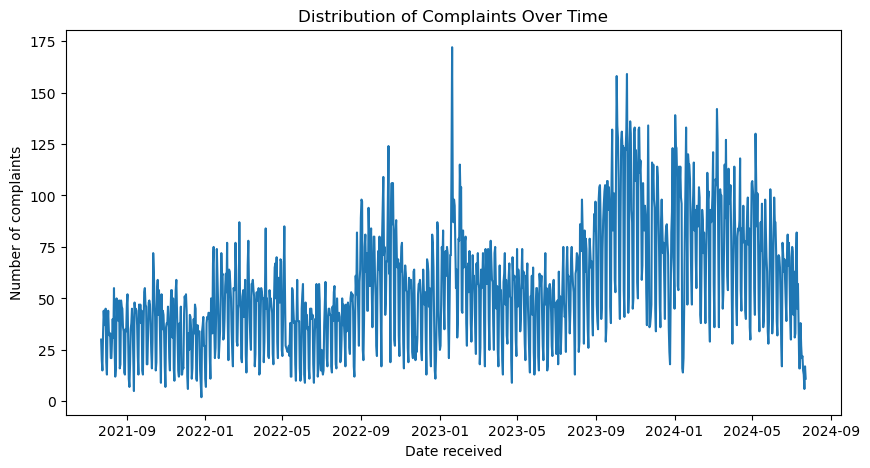

**Interpretation**:
1. A notable surge in complaints occurred between January and March 2023.
2. The highest daily complaint was recorded on January 20 2023, with 172 complaints received.
3. The lowest daily complaint count was on December 26 2021, with only two complaints received.
4. The overall trend shows a cyclical pattern with periodic peaks and troughs in complaint volumes.

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(df['Date received'].value_counts())
plt.ylabel('Number of complaints')
plt.title('Distribution of Complaints Over Time')
plt.show()
text = """**Interpretation**:
1. A notable surge in complaints occurred between January and March 2023.
2. The highest daily complaint was recorded on January 20 2023, with 172 complaints received.
3. The lowest daily complaint count was on December 26 2021, with only two complaints received.
4. The overall trend shows a cyclical pattern with periodic peaks and troughs in complaint volumes."""
display(Markdown(text))

In [14]:
df.groupby(['Date received', 'Product']).size().unstack(fill_value=0)

Product        Student loan  Vehicle loan or lease
Date received                                     
2021-07-23               11                     19
2021-07-24                6                     14
2021-07-25                8                      7
2021-07-26                9                     24
2021-07-27               17                     27
...                     ...                    ...
2024-07-19                6                      9
2024-07-20                5                      8
2024-07-21                3                      3
2024-07-22                7                     10
2024-07-23                1                     10

[1095 rows x 2 columns]

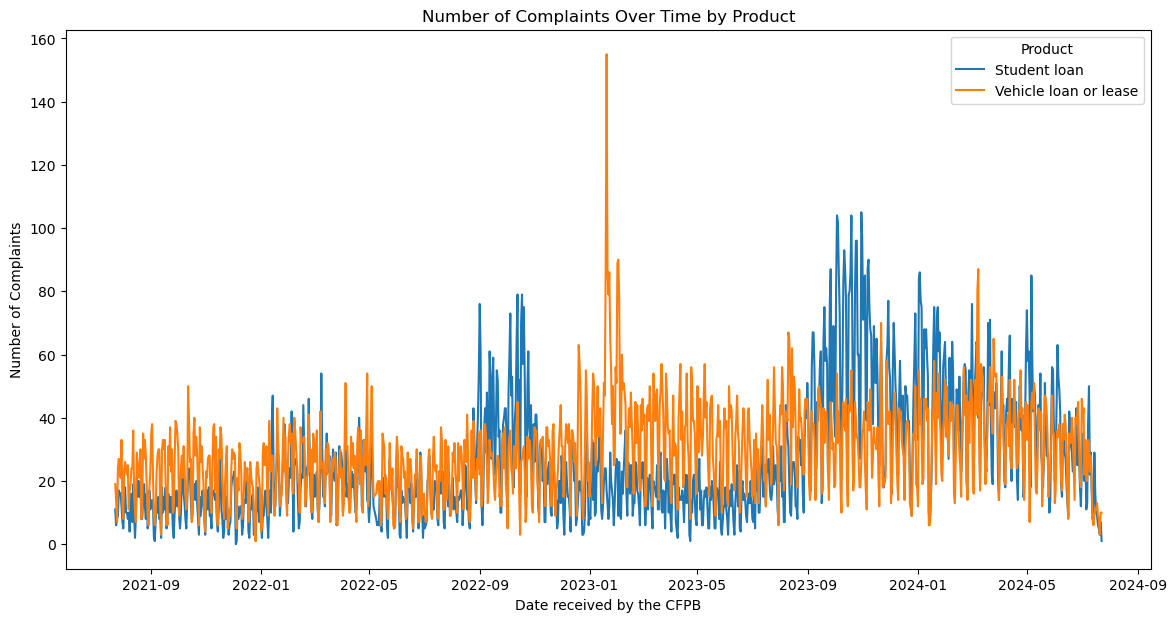

**Interpretation**:
1. Vehicle loan or lease complaints (orange line) spike significantly in early 2023, showing higher peaks compared to student loan complaints (blue line).
2. Student loan complaints have multiple peaks, notably in late 2022 and mid-2023.
3. The overall trend shows some consistency in the number of complaints, with occasional spikes

In [15]:
product_complaints = df.groupby(['Date received', 'Product']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
for product in product_complaints.columns:
    sns.lineplot(data=product_complaints, x=product_complaints.index, y=product, label=product)

plt.title('Number of Complaints Over Time by Product')
plt.xlabel('Date received by the CFPB')
plt.ylabel('Number of Complaints')
plt.legend(title='Product')
plt.show()
text = """**Interpretation**:
1. Vehicle loan or lease complaints (orange line) spike significantly in early 2023, showing higher peaks compared to student loan complaints (blue line).
2. Student loan complaints have multiple peaks, notably in late 2022 and mid-2023.
3. The overall trend shows some consistency in the number of complaints, with occasional spikes"""
display(Markdown(text))

### 2. Product

In [16]:
df['Product'].value_counts()
#Balanced dataset

Product
Vehicle loan or lease    31835
Student loan             28350
Name: count, dtype: int64

In [17]:
prdt_perc = pd.DataFrame(columns= ['Loan', 'Perc_Complaints'])
for p in df['Product'].value_counts().index:
    perc = f"{(df['Product'].value_counts()[p]*100)/len(df['Product']):.3f}%"
    new_row = pd.DataFrame({'Loan':[p],'Perc_Complaints':perc})
    prdt_perc = pd.concat([prdt_perc,new_row],ignore_index=True)
prdt_perc

Loan Perc_Complaints
0  Vehicle loan or lease         52.895%
1           Student loan         47.105%

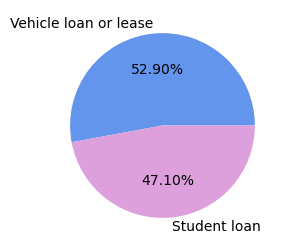

**Observation: Balanced Dataset**

In [18]:
plt.figure(figsize=(5,3))
plt.pie(df['Product'].value_counts(), labels = df['Product'].value_counts().index,autopct = '%.2f%%',colors = ['cornflowerblue','plum'])
plt.show()
text="**Observation: Balanced Dataset**"
display(Markdown(text))

### 3. Sub-Product

In [19]:
#Number of complaints per sub-product for student loans
student_subprd = df[df['Product']=='Student loan']['Sub-product'].value_counts()
student_subprd

Sub-product
Federal student loan servicing    21815
Private student loan               6535
Name: count, dtype: int64

In [20]:
#Number of complaints per sub-product for vehicle loans
vehicle_subprd =df[df['Product']=='Vehicle loan or lease']['Sub-product'].value_counts()
vehicle_subprd

Sub-product
Loan          27525
Lease          4285
Title loan       25
Name: count, dtype: int64

**Interpretation**:

Student Loan Complaints:
- Federal student loan servicing (76.95%): Majority of issues.
- Private student loan (23.05%): Less frequent, but notable.

Vehicle Loan or Lease Complaints:
- Loan (86.46%): Predominant issue.
- Lease (13.46%): Less common.
- Title loan (0.08%): Rarely reported. 

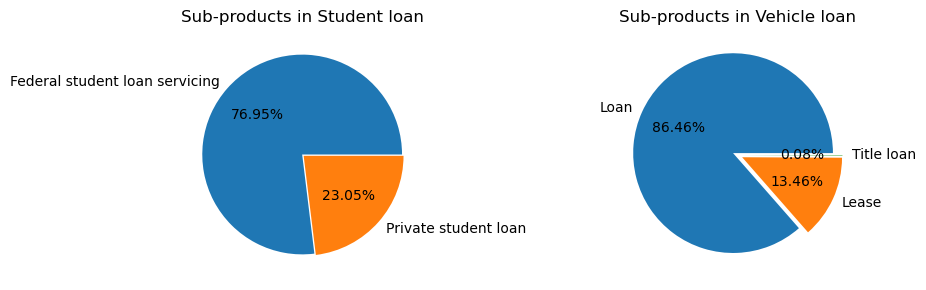

In [21]:
fig = plt.figure(figsize=(10, 3))
fig.add_subplot(1, 2, 1)
plt.title('Sub-products in Student loan')
plt.pie(student_subprd,labels=student_subprd.index,autopct = '%.2f%%',explode=[0.01,0.01])
fig.add_subplot(1, 2, 2)
plt.title('Sub-products in Vehicle loan')
plt.pie(vehicle_subprd,labels=vehicle_subprd.index,autopct = '%.2f%%',explode=[0.05,0.05,0.05])
plt.tight_layout()
text = """**Interpretation**:

Student Loan Complaints:
- Federal student loan servicing (76.95%): Majority of issues.
- Private student loan (23.05%): Less frequent, but notable.

Vehicle Loan or Lease Complaints:
- Loan (86.46%): Predominant issue.
- Lease (13.46%): Less common.
- Title loan (0.08%): Rarely reported. """
display(Markdown(text))

### 4. Issue

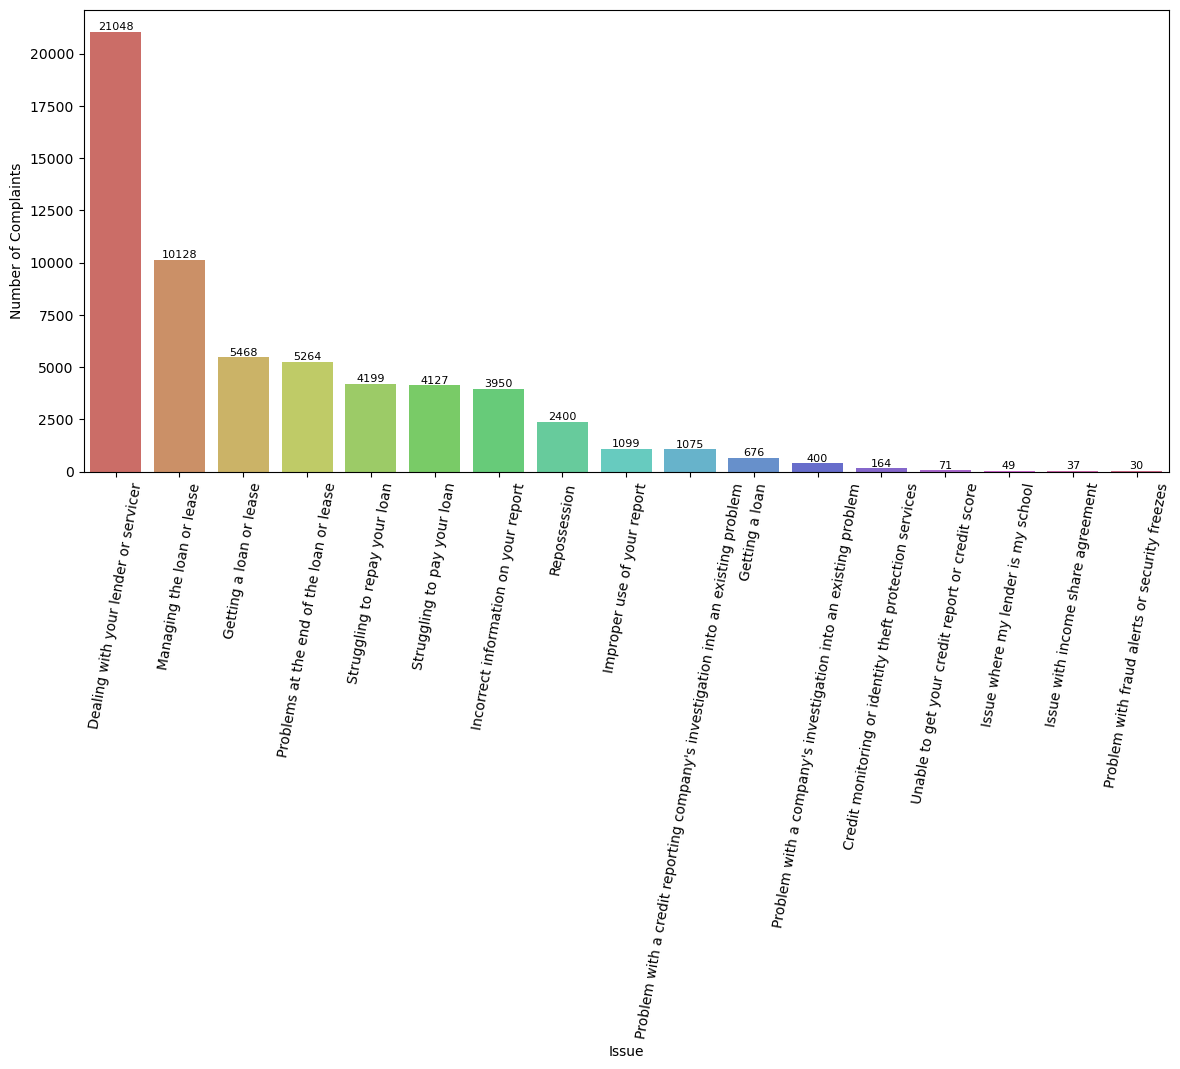

**Interpretation:**
'Dealing with your lender or servicer' issue tops the complaints and 'Problem with fraud alerts or security freezes' issue is the least frequent in the complaints 

In [22]:
plt.figure(figsize=(14,6))
ax = sns.barplot(df['Issue'].value_counts(),palette='hls')
plt.xticks(rotation=80)
plt.tight_layout()
for i in range(len(df['Issue'].value_counts())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('Number of Complaints')
plt.show()
text="""**Interpretation:**
'Dealing with your lender or servicer' issue tops the complaints and 'Problem with fraud alerts or security freezes' issue is the least frequent in the complaints """
display(Markdown(text))

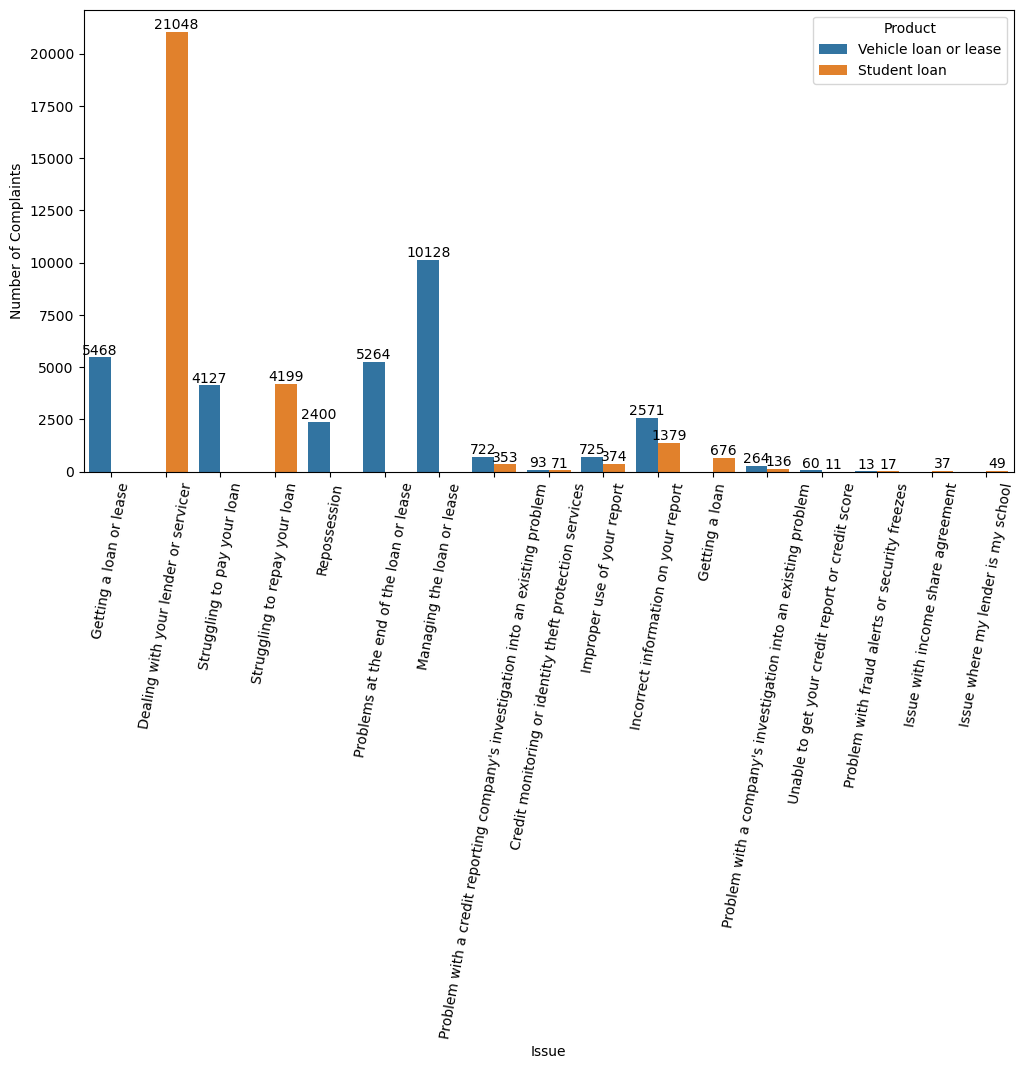

**Interpretation:** The majority of reported issues are 'lender issues', and these are almost exclusively related to student loans. Other types of issues are primarily associated with vehicle loans.

In [23]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Issue', data=df,hue='Product') 
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xticks(rotation = 80)
plt.tight_layout()
plt.ylabel('Number of Complaints')
plt.show()
text ="**Interpretation:** The majority of reported issues are 'lender issues', and these are almost exclusively related to student loans. Other types of issues are primarily associated with vehicle loans."
display(Markdown(text))

### 5. Sub-Issue

In [24]:
df['Sub-issue'].value_counts()

Sub-issue
Trouble with how payments are being handled                                    7246
Received bad information about your loan                                       6810
Billing problem                                                                4866
Problem with customer service                                                  3342
Unable to receive car title or other problem after the loan is paid off        2571
                                                                               ... 
Dealing with provider of income share agreement                                   9
Received unsolicited financial product or insurance offers after opting out       9
Billing or statement issues                                                       7
Received unwanted marketing or advertising                                        5
Problem getting your free annual credit report                                    4
Name: count, Length: 81, dtype: int64

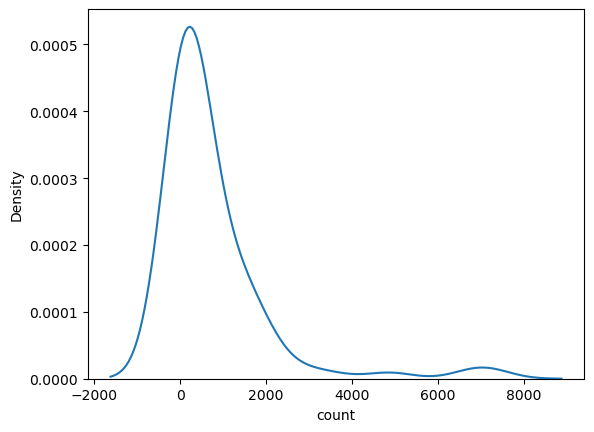

In [25]:
sns.kdeplot(df['Sub-issue'].value_counts())
plt.show()

**Interpretation:**
1. The top three sub-issues – "Trouble with how payments are being handled," "Received bad information about your loan," and "Billing problem" – account for a significant portion of all complaints. 
2. Highly Skewed Distribution: The plot, a Kernel Density Estimation (KDE) plot, shows a highly skewed distribution. This means that most "Sub-issues" have a relatively low count, while a few have a very high count.

### 6. Consumer complaint narrative

In [26]:
no_narrative = df[df['Consumer complaint narrative'].isna()]
print(no_narrative.shape[0],"Complaints with no 'Consumer complaint narrative' ")
df_non_null_narrative = df[~df['Consumer complaint narrative'].isna()]
print(df_non_null_narrative.shape[0],"Complaints with 'Consumer complaint narrative' ")

27674 Complaints with no 'Consumer complaint narrative' 
32511 Complaints with 'Consumer complaint narrative' 


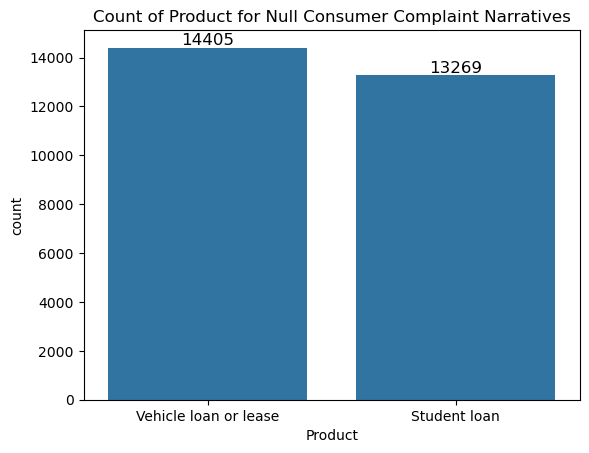

**Interpretation:** We have nearly equal distribution for both the types of loan for the ones where the consumers haven't written complaint narrative

In [27]:
no_narrative = df[df['Consumer complaint narrative'].isna()]
ax = sns.countplot(data = no_narrative, x = 'Product')
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title('Count of Product for Null Consumer Complaint Narratives')
plt.show()
text ="**Interpretation:** We have nearly equal distribution for both the types of loan for the ones where the consumers haven't written complaint narrative"
display(Markdown(text))

In [28]:
complaint_narratives = df_non_null_narrative['Consumer complaint narrative']

In [29]:
df['Word_count'] = complaint_narratives.apply(lambda x: len(str(x).split()))
print("Average","\033[1m" + "word count"+"\033[0;0m", "for consumer complaint narrative:")
print("Vehicle loan =",df[df['Product']=='Vehicle loan or lease']['Word_count'].mean()) 
print("Student loan =",df[df['Product']=='Student loan']['Word_count'].mean())
text = "**Observation:** Vehicle loan complaint narratives are slightly more wordy than the Student loan"
display(Markdown(text))

df['Char_count'] = complaint_narratives.apply(lambda x: len(str(x)))
print("Average","\033[1m" + "number of characters"+"\033[0;0m", "for consumer complaint narrative:" )
print("Vehicle loan =",df[df['Product']=='Vehicle loan or lease']['Char_count'].mean()) 
print("Student loan =",df[df['Product']=='Student loan']['Char_count'].mean())
text = "**Observation:** Vehicle loan complaint narratives are longer than Student loan"
display(Markdown(text))

df['Unique_word_count'] = complaint_narratives.apply(lambda x: len(set(str(x).split())))
print("Unique","\033[1m" + "word count"+"\033[0;0m", "for consumer complaint narrative:")
print("Vehicle loan =",df[df['Product']=='Vehicle loan or lease']['Unique_word_count'].mean()) 
print("Student loan =",df[df['Product']=='Student loan']['Unique_word_count'].mean())
text = "**Observation:** Both types of complaint narratives have same average number of unique words in their narrative"
display(Markdown(text))

Average word count for consumer complaint narrative:
Vehicle loan = 235.19948364888123
Student loan = 227.24209269942313


**Observation:** Vehicle loan complaint narratives are slightly more wordy than the Student loan

Average number of characters for consumer complaint narrative:
Vehicle loan = 1289.5797475616753
Student loan = 1276.8316424640275


**Observation:** Vehicle loan complaint narratives are longer than Student loan

Unique word count for consumer complaint narrative:
Vehicle loan = 119.54291451520368
Student loan = 120.12658311783038


**Observation:** Both types of complaint narratives have same average number of unique words in their narrative

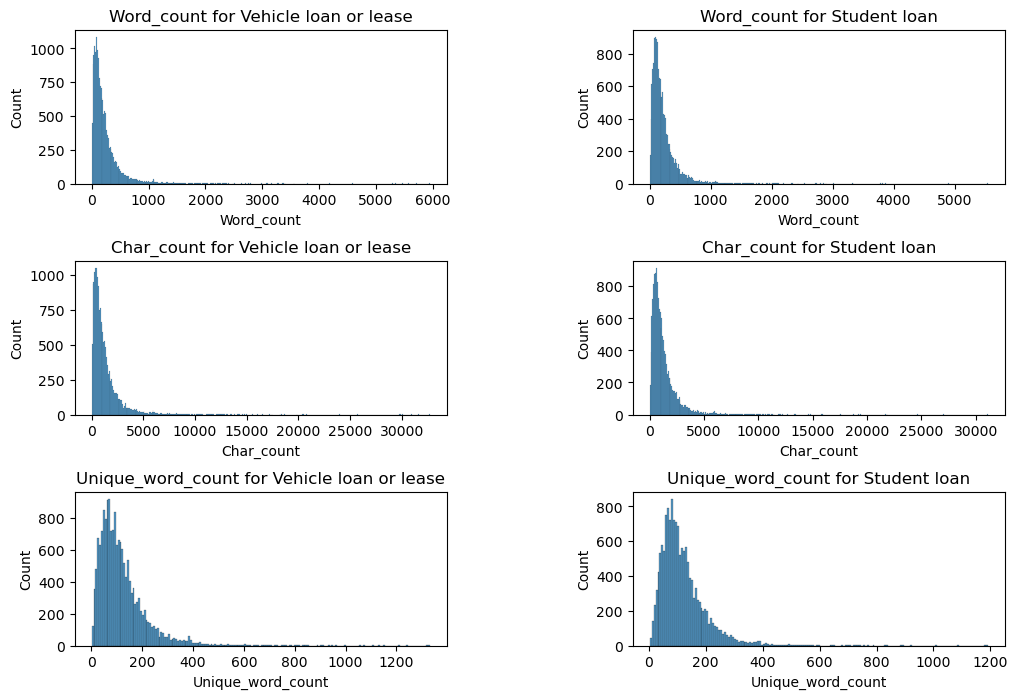

**Interpretation:** The distributions of word,characters and unique word counts for both student and vehicle loans are highly skewed to the right. This means that most complaints have a relatively small number of characters,words or unique words, while a few complaints have a very large number of them.

In [30]:
b = ['Word_count','Char_count','Unique_word_count']
c = ['Vehicle loan or lease','Student loan']
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(b)):
    for j in range(len(c)):
        plt.subplot(3, 2, 2*i + j + 1)
        plt.xticks()
        sns.histplot(df[df['Product'] == c[j]][b[i]]) 
        plt.title(f'{b[i]} for {c[j]}')
plt.show()
text = """**Interpretation:** The distributions of word,characters and unique word counts for both student and vehicle loans are highly skewed to the right. This means that most complaints have a relatively small number of characters,words or unique words, while a few complaints have a very large number of them."""
display(Markdown(text))

### 7. Company public response

In [31]:
print(df['Company public response'].value_counts())
text = """**Observation:** 'Company has responded to the consumer and the CFPB and chooses not to provide a public response' is the most frequently used public-facing response by companies from a pre-set list of options available for posting on the public database, followed by 'Company believes it acted appropriately as authorized by contract or law,' which is the second top most used public response."""
display(Markdown(text))

Company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            13104
Company believes it acted appropriately as authorized by contract or law                                                    9704
Company believes complaint is the result of an isolated error                                                                111
Company disputes the facts presented in the complaint                                                                         92
Company believes the complaint is the result of a misunderstanding                                                            88
Company believes the complaint provided an opportunity to answer consumer's questions                                         61
Company believes complaint caused principally by actions of third party outside the control or direction of the company       53
Company believes complaint represents an opportunity for improvement to b

**Observation:** 'Company has responded to the consumer and the CFPB and chooses not to provide a public response' is the most frequently used public-facing response by companies from a pre-set list of options available for posting on the public database, followed by 'Company believes it acted appropriately as authorized by contract or law,' which is the second top most used public response.

**Observation:** The most used company response is significantly more common for vehicle loan complaints compared to student loan complaints. The second top-most used response, 'Company believes it acted appropriately as authorized by contract or law,' is more frequently applied to student loan complaints.

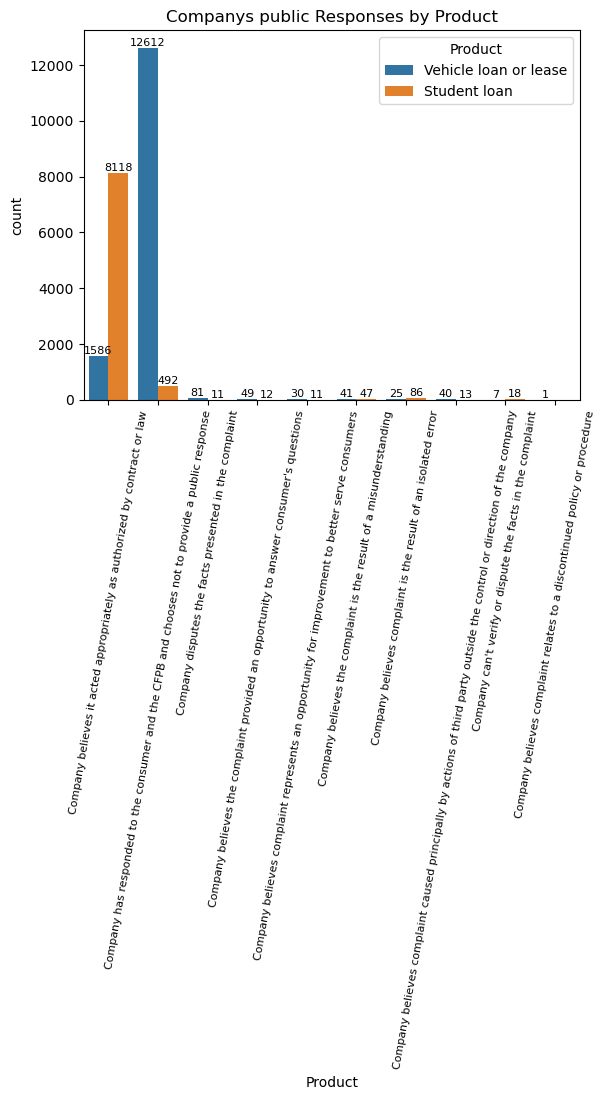

In [32]:
ax = sns.countplot(x='Company public response', data=df,hue='Product') 
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation = 80,fontsize=8)
plt.title('Companys public Responses by Product')
plt.xlabel('Product')
plt.tight_layout()
text="""**Observation:** The most used company response is significantly more common for vehicle loan complaints compared to student loan complaints. The second top-most used response, 'Company believes it acted appropriately as authorized by contract or law,' is more frequently applied to student loan complaints."""
display(Markdown(text))

**Interpretation**:
1. Response: The number of complaints for which the companies chose not to publish any public response
2. No Response: The number of complaints for which the companies published a response, indicating companies published responses for more Vehicle loan complaints compared to Student loan complaints.


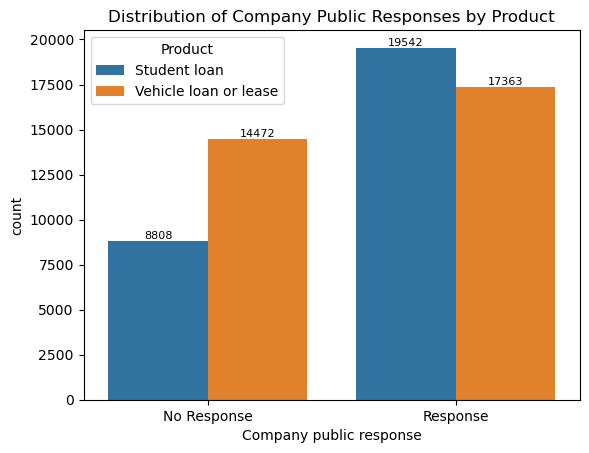

In [33]:
ax = sns.countplot(x=df['Company public response'].isna(),hue=df['Product']) 
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.title('Distribution of Company Public Responses by Product')
ax.set_xticklabels(['No Response', 'Response'])
text = """**Interpretation**:
1. Response: The number of complaints for which the companies chose not to publish any public response
2. No Response: The number of complaints for which the companies published a response, indicating companies published responses for more Vehicle loan complaints compared to Student loan complaints.
"""
display(Markdown(text))

### 8. Company

In [34]:
company_counts = df['Company'].value_counts()
print("\033[1m" + "Top 10 companies with highest number of Vehicle and Student complaints: "+"\033[0;0m",'\n',company_counts[:10])

Top 10 companies with highest number of Vehicle and Student complaints:  
 Company
MOHELA                                   7598
Nelnet, Inc.                             5001
Navient Solutions, LLC.                  4405
EdFinancial Services                     2829
Maximus Education, LLC dba Aidvantage    2669
AES/PHEAA                                2535
WELLS FARGO & COMPANY                    2444
ALLY FINANCIAL INC.                      2299
CREDIT ACCEPTANCE CORPORATION            2118
Westlake Services, LLC                   1844
Name: count, dtype: int64


**Interpretation**:
MOHELA Company has received the maximum number of Complaints - 7598 followed by Nelnet, Inc. with 5001 complaints and Navient 
Solutions, LLC. with 4405 complaints

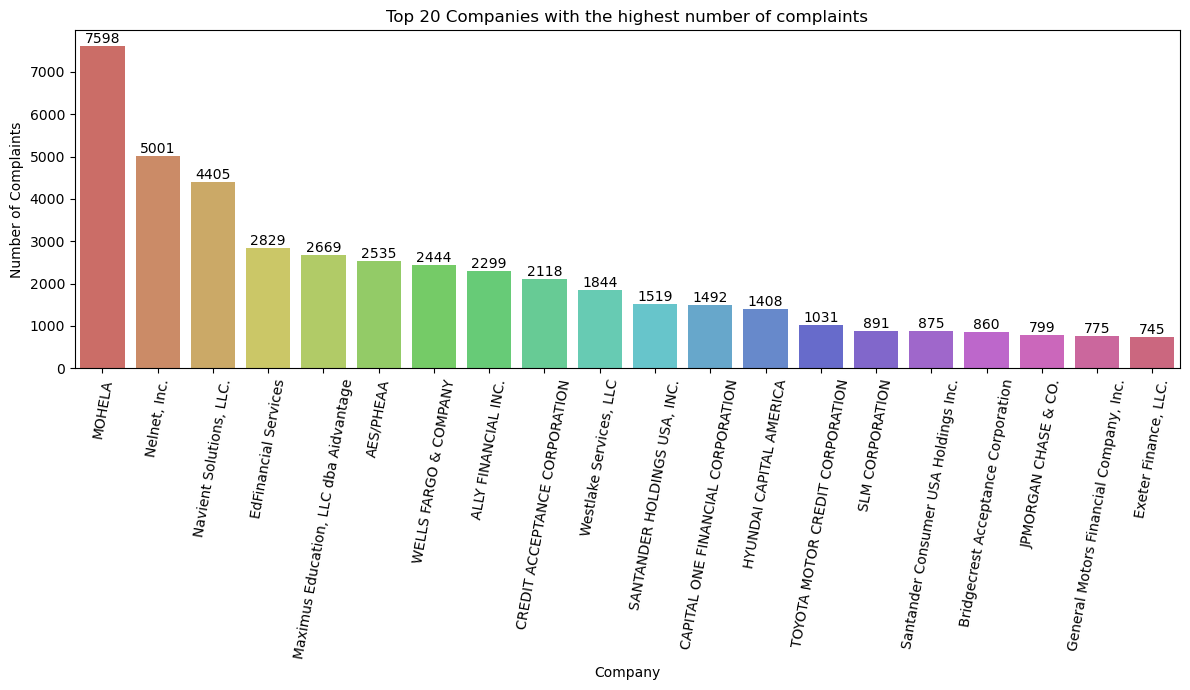

In [35]:
plt.figure(figsize=(12,7))
ax =sns.barplot(company_counts[:20],palette='hls')
for i in range(20):
    ax.bar_label(ax.containers[i], fontsize=10)
plt.xticks(rotation=80,fontsize=10)
plt.ylabel('Number of Complaints')
plt.title('Top 20 Companies with the highest number of complaints')
plt.tight_layout()
text ="""**Interpretation**:
MOHELA Company has received the maximum number of Complaints - 7598 followed by Nelnet, Inc. with 5001 complaints and Navient 
Solutions, LLC. with 4405 complaints"""
display(Markdown(text))

In [36]:
top_10_data = df[df['Company'].isin(company_counts.index[:10])]
top_10_data.head(1)

Date received       Product                     Sub-product  \
1    2024-01-12  Student loan  Federal student loan servicing   

                                  Issue  \
1  Dealing with your lender or servicer   

                                     Sub-issue Consumer complaint narrative  \
1  Trouble with how payments are being handled                          NaN   

                             Company public response Company State ZIP code  \
1  Company believes it acted appropriately as aut...  MOHELA    PA    15227   

   ... Consumer consent provided? Submitted via Date sent to company  \
1  ...       Consent not provided           Web           2024-01-12   

  Company response to consumer Timely response? Consumer disputed?  \
1      Closed with explanation              Yes                NaN   

   Complaint ID  Word_count  Char_count  Unique_word_count  
1       8195086         NaN         NaN                NaN  

[1 rows x 21 columns]

In [37]:
pivot_data = top_10_data.pivot_table(index='Company', columns='Product', aggfunc='size', fill_value=0)
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('Total', ascending=False)
pivot_data = pivot_data.drop(columns='Total')
pivot_data 

Product                                Student loan  Vehicle loan or lease
Company                                                                   
MOHELA                                         7598                      0
Nelnet, Inc.                                   5000                      1
Navient Solutions, LLC.                        4405                      0
EdFinancial Services                           2829                      0
Maximus Education, LLC dba Aidvantage          2669                      0
AES/PHEAA                                      2535                      0
WELLS FARGO & COMPANY                            73                   2371
ALLY FINANCIAL INC.                               1                   2298
CREDIT ACCEPTANCE CORPORATION                     0                   2118
Westlake Services, LLC                            0                   1844

**Interpretation**:
1. MOHELA, a company providing Student Loans, has the highest number of complaints.
2. The majority of complaints from the top companies are related to Student Loans.
3. Out of the top companies, 8 have most of their complaints related to Student Loans, while 5 have a significant number of complaints related to Vehicle Loans.

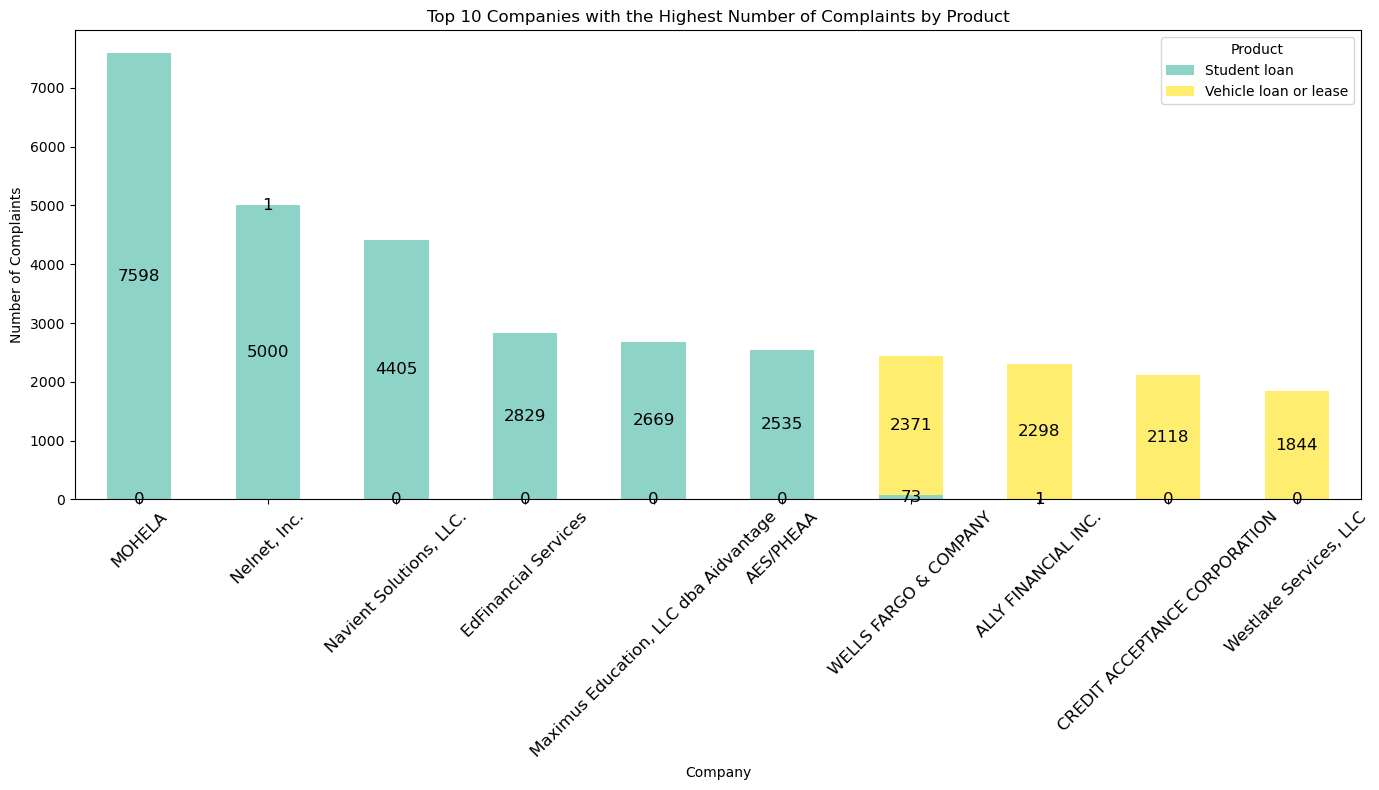

In [38]:
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
for container in ax.containers:
    ax.bar_label(container, fontsize=12, label_type='center')

plt.title('Top 10 Companies with the Highest Number of Complaints by Product')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45,fontsize=12)
plt.tight_layout()
text ="""**Interpretation**:
1. MOHELA, a company providing Student Loans, has the highest number of complaints.
2. The majority of complaints from the top companies are related to Student Loans.
3. Out of the top companies, 8 have most of their complaints related to Student Loans, while 5 have a significant number of complaints related to Vehicle Loans."""
display(Markdown(text))

### 9. State

In [39]:
state_complaints_count = df.pivot_table(index='State', columns='Product', aggfunc='size', fill_value=0)
state_complaints_count['Total'] = state_complaints_count.sum(axis=1)
state_complaints_count = state_complaints_count.sort_values(by='Total', ascending=False)
state_complaints_count.head()

Product  Student loan  Vehicle loan or lease  Total
State                                              
CA               2845                   3186   6031
FL               1737                   3317   5054
TX               1877                   3014   4891
NY               1975                   1769   3744
GA               1129                   2534   3663

In [40]:
print(f"There are complaints from {state_complaints_count.shape[0]} different states.")

There are complaints from 58 different states.


**Interpretation**:
1. CA(California) has the maximum complaints followed by (FL)Florida, (TX)Texas
2.  The distribution of complaints is right-skewed, with a few states having significantly higher complaints.


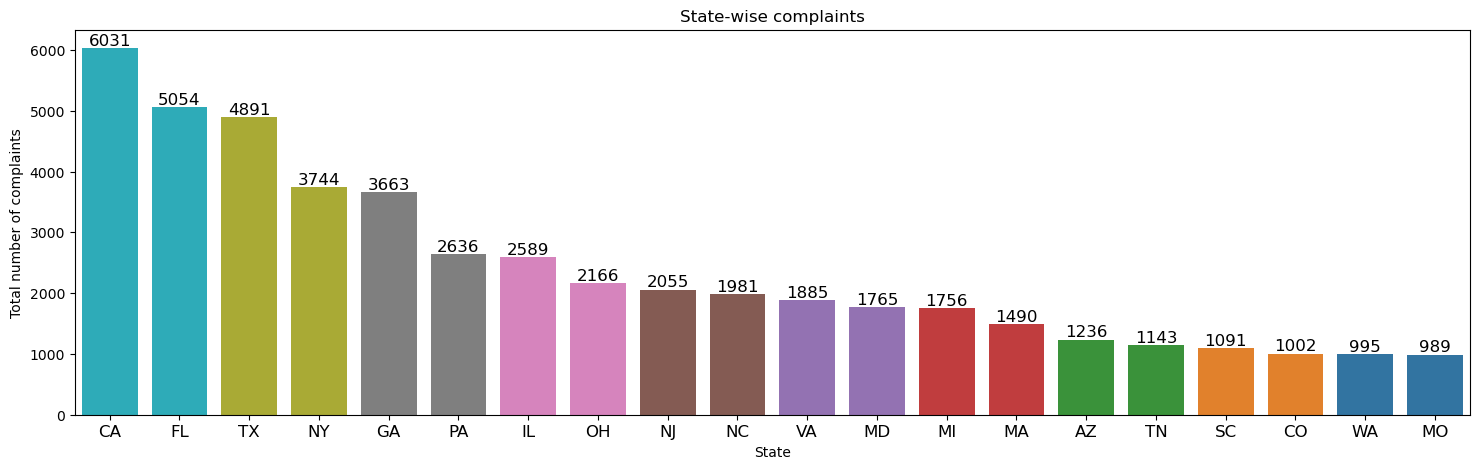

In [41]:
plt.figure(figsize=(18,5))
ax = sns.barplot(data = state_complaints_count[:20], x = state_complaints_count.index[:20], y = 'Total',palette='tab10_r') 
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.title("State-wise complaints")
plt.ylabel('Total number of complaints')
text = """**Interpretation**:
1. CA(California) has the maximum complaints followed by (FL)Florida, (TX)Texas
2.  The distribution of complaints is right-skewed, with a few states having significantly higher complaints.
"""
display(Markdown(text))

**Interpretation**:
1. There is a relatively balanced distribution of both types of complaints (Student loan and Vehicle loan) across most states.
2. Some states like Florida (FL) and Texas (TX) have a higher number of vehicle loan complaints, whereas New York (NY) has more student loan complaints.


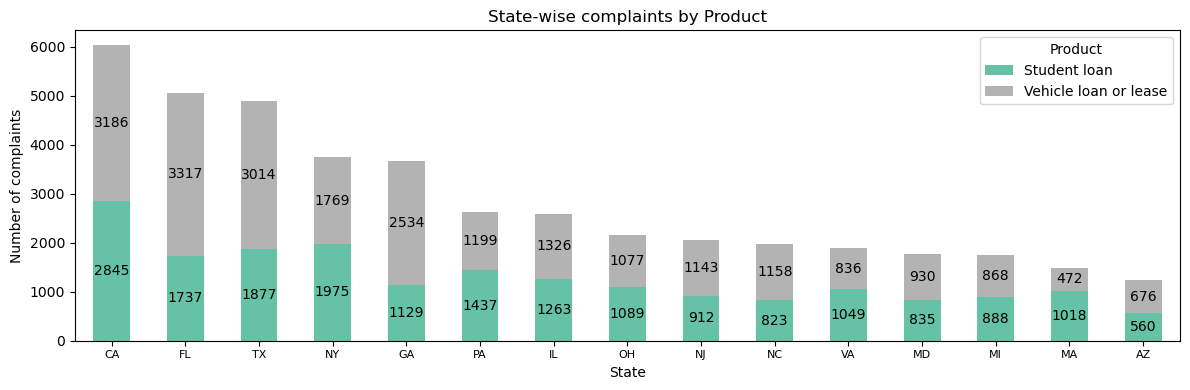

In [42]:
ax = state_complaints_count[['Student loan','Vehicle loan or lease']][:15].plot(kind='bar', stacked=True, figsize=(12, 4), colormap='Set2')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='center')
    
plt.xticks(fontsize=8,rotation=0)
plt.title("State-wise complaints by Product")
plt.ylabel('Number of complaints')
plt.tight_layout()
text = """**Interpretation**:
1. There is a relatively balanced distribution of both types of complaints (Student loan and Vehicle loan) across most states.
2. Some states like Florida (FL) and Texas (TX) have a higher number of vehicle loan complaints, whereas New York (NY) has more student loan complaints.
"""
display(Markdown(text))

### 10. ZIP code

In [43]:
print(df['ZIP code'].value_counts())

ZIP code
XXXXX    1787
30349      93
604XX      77
080XX      76
30318      67
         ... 
54220       1
75750       1
12966       1
52601       1
25832       1
Name: count, Length: 10843, dtype: int64


In [44]:
print(f"There are {df['ZIP code'].nunique()} unique ZIP codes in the datset")

There are 10843 unique ZIP codes in the datset


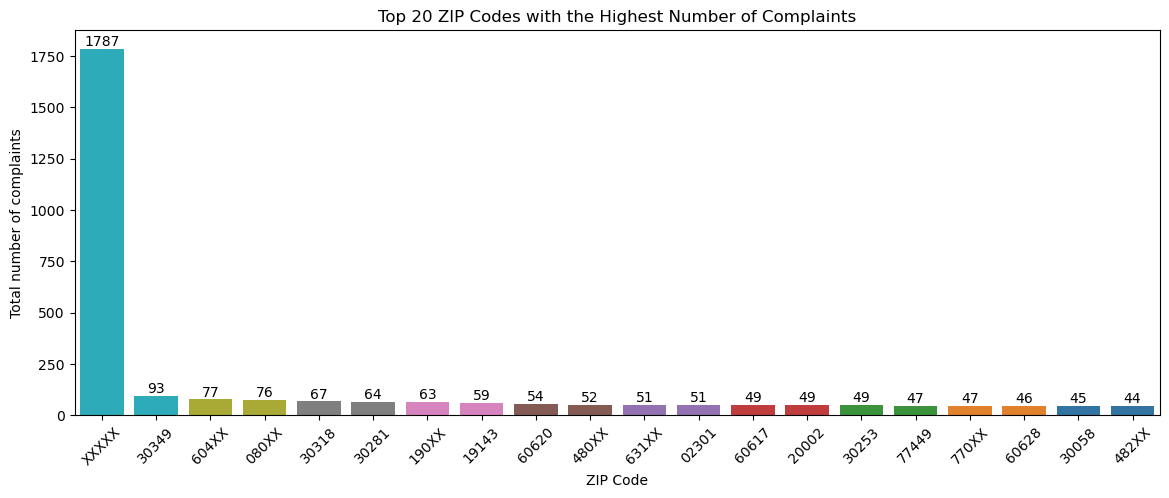

In [45]:
top_zip_counts = df['ZIP code'].value_counts().head(20)
plt.figure(figsize=(14, 5))
ax = sns.barplot(x=top_zip_counts.index, y=top_zip_counts.values, palette='tab10_r')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Total number of complaints')
plt.xlabel('ZIP Code')
plt.title('Top 20 ZIP Codes with the Highest Number of Complaints')
plt.show()

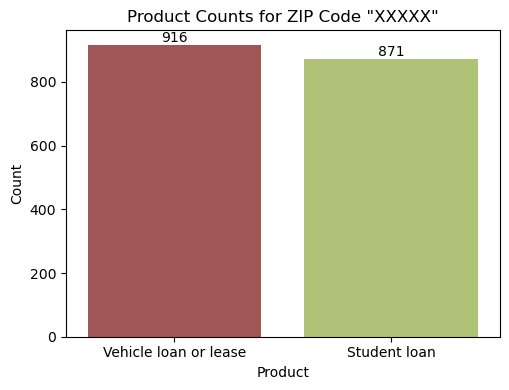

In [46]:
plt.figure(figsize=(5,4))
zip_counts = df[df['ZIP code'] == 'XXXXX']['Product'].value_counts() 
ax = sns.barplot(x=zip_counts.index, y=zip_counts.values, palette='tab20b_r') 
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Product Counts for ZIP Code "XXXXX"')
plt.tight_layout()
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [47]:
zip_loan_counts = df.pivot_table(index='ZIP code', columns='Product', aggfunc='size', fill_value=0)
zip_loan_counts['Total'] = zip_loan_counts.sum(axis=1)
zip_loan_counts = zip_loan_counts.sort_values(by='Total', ascending=False)
zip_loan_counts.head()

Product   Student loan  Vehicle loan or lease  Total
ZIP code                                            
XXXXX              871                    916   1787
30349               15                     78     93
604XX               28                     49     77
080XX               41                     35     76
30318               22                     45     67

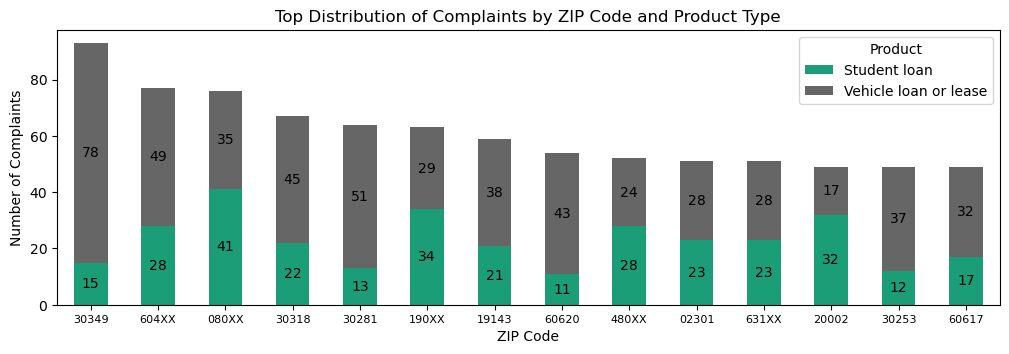

In [48]:
ax = zip_loan_counts[['Student loan','Vehicle loan or lease']].iloc[1:15].plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Dark2')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='center')
plt.title('Top Distribution of Complaints by ZIP Code and Product Type')
plt.xlabel('ZIP Code')
plt.tight_layout()
plt.xticks(fontsize=8,rotation=0)
plt.ylabel('Number of Complaints')
plt.show()

**Observations:** 
1. The placeholder ZIP code XXXXX has 1787 complaints,the highest number of complaints across different zip code skewing data analysis.
2. The masked ZIP code XXXXX shows an even split between vehicle loans (916) and student loans (871). 
3. ZIP code 30349 has the highest complaints, primarily vehicle loans (78) followed by zip code 604XX.

### 11. Tags

**Interpretation**: 
1. "Servicemember" is the dominant tag, appearing much more frequently than "Older American". 
2. This indicates that a higher proportion of complaints involve individuals connected to military service compared to older Americans.

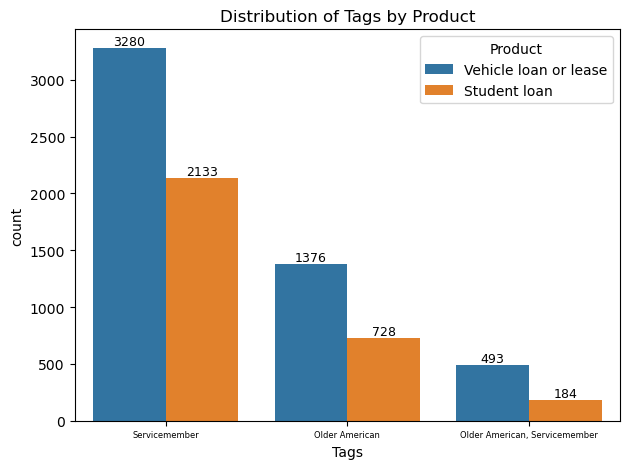

In [49]:
ax = sns.countplot(x='Tags', hue = 'Product', data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xticks(fontsize=6)
plt.title('Distribution of Tags by Product')
plt.tight_layout()

text = """**Interpretation**: 
1. "Servicemember" is the dominant tag, appearing much more frequently than "Older American". 
2. This indicates that a higher proportion of complaints involve individuals connected to military service compared to older Americans."""
display(Markdown(text))

### 12. Consumer consent provided?

**Interpretation:** 
1. The graph shows a relatively even distribution of product types within each consent category. This suggests that consent itself isn't strongly correlated with the type of complaint.
2. Most of the complaints belong to the category 'Consent provided', indicating that a majority of consumers opt to publish their complaint narratives.

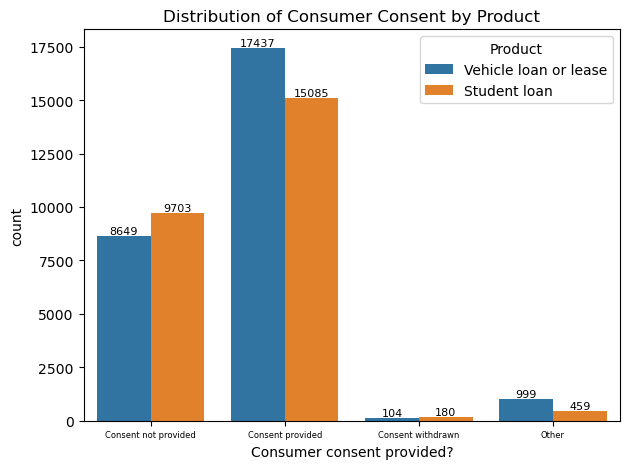

In [50]:
ax = sns.countplot(x='Consumer consent provided?', hue='Product', data=df) 
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(fontsize=6)
plt.title('Distribution of Consumer Consent by Product')
plt.tight_layout()
text = '''**Interpretation:** 
1. The graph shows a relatively even distribution of product types within each consent category. This suggests that consent itself isn't strongly correlated with the type of complaint.
2. Most of the complaints belong to the category 'Consent provided', indicating that a majority of consumers opt to publish their complaint narratives.'''  
display(Markdown(text))

### 13. Submitted via

In [51]:
print(((df['Submitted via'].value_counts()*100)/(df['Submitted via'].shape[0])).round(3))

Submitted via
Web             90.951
Phone            5.161
Referral         3.110
Postal mail      0.518
Web Referral     0.259
Name: count, dtype: float64


**Interpretation:** 
1. 90% of the complaints were filed through Web.
2. Phone submissions account for a little over 5%, while other methods such as Referral, Postal mail, and Web Referral are less commonly used.


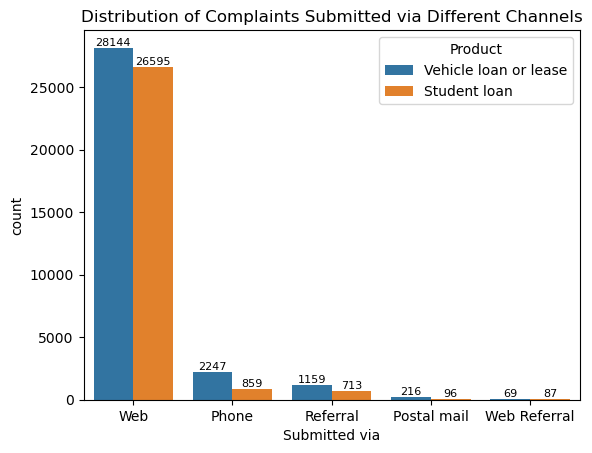

In [52]:
ax = sns.countplot(x='Submitted via', hue='Product', data=df) 
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.title('Distribution of Complaints Submitted via Different Channels')
text = """**Interpretation:** 
1. 90% of the complaints were filed through Web.
2. Phone submissions account for a little over 5%, while other methods such as Referral, Postal mail, and Web Referral are less commonly used.
"""
display(Markdown(text))

### 14. Date sent to company

**Interpretation:** 
The distribution of complaints sent to the company over time follows a similar pattern to the distribution of complaints received by the CFPB. This indicates that the timeline for sending complaints to companies is consistent with when they are received by the CFPB.


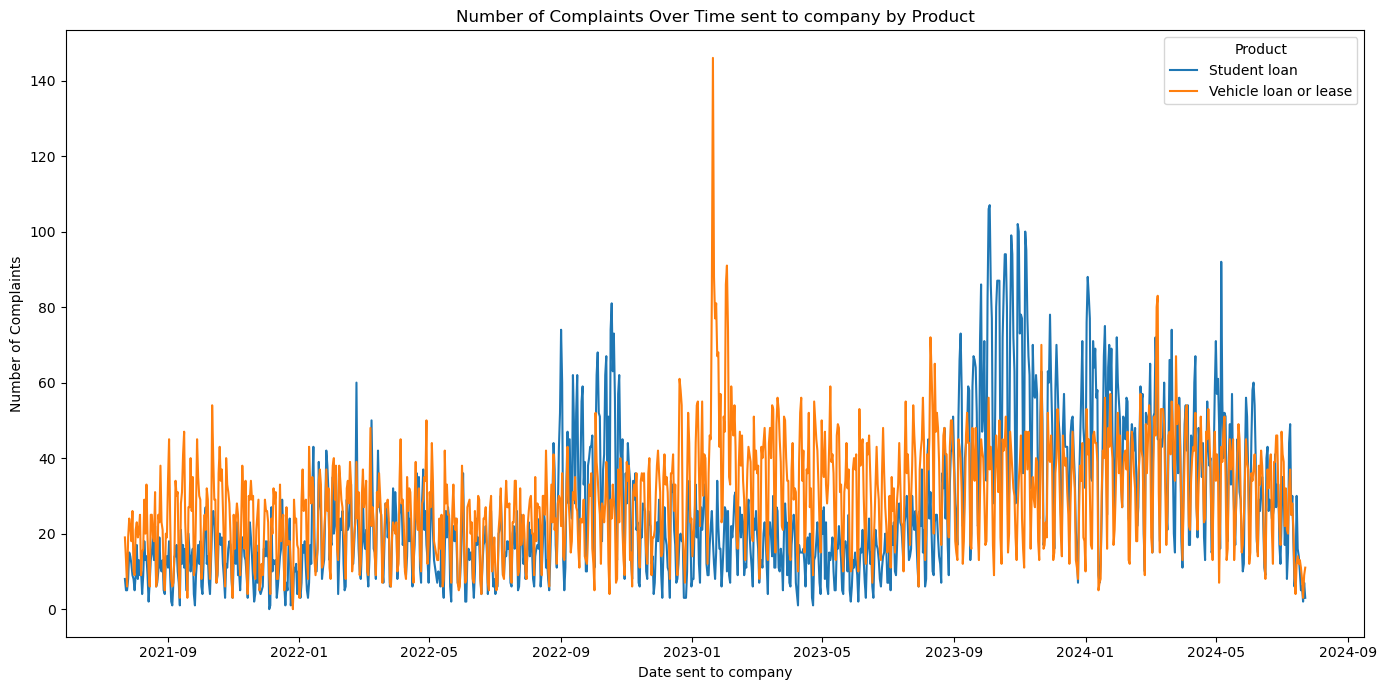

In [53]:
date_sent_complaints = df.groupby(['Date sent to company', 'Product']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
for product in date_sent_complaints .columns:
    sns.lineplot(data=date_sent_complaints , x=date_sent_complaints.index, y=product, label=product)

plt.title('Number of Complaints Over Time sent to company by Product')
plt.xlabel('Date sent to company')
plt.ylabel('Number of Complaints')
plt.legend(title='Product')
plt.tight_layout()
text = """**Interpretation:** 
The distribution of complaints sent to the company over time follows a similar pattern to the distribution of complaints received by the CFPB. This indicates that the timeline for sending complaints to companies is consistent with when they are received by the CFPB.
"""
display(Markdown(text))

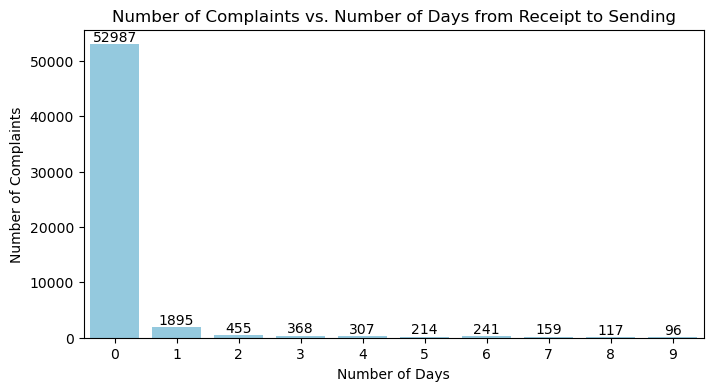

In [54]:
time_diff = (df['Date sent to company'] - df['Date received']).dt.days
complaint_counts = time_diff.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x = complaint_counts.index[:10],y= complaint_counts.values[:10],color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Number of Days')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints vs. Number of Days from Receipt to Sending')
plt.show()

In [55]:
time_diff.values.max()

196

In [56]:
df.iloc[time_diff[time_diff==196]]

Date received       Product           Sub-product  \
196    2023-09-29  Student loan  Private student loan   

                                    Issue                          Sub-issue  \
196  Dealing with your lender or servicer  Don't agree with the fees charged   

                          Consumer complaint narrative  \
196  My issue is with Navient. \nI have two account...   

    Company public response                  Company State ZIP code  ...  \
196                     NaN  Navient Solutions, LLC.    OH    455XX  ...   

    Consumer consent provided? Submitted via Date sent to company  \
196           Consent provided           Web           2023-09-29   

    Company response to consumer Timely response? Consumer disputed?  \
196      Closed with explanation              Yes                NaN   

     Complaint ID  Word_count  Char_count  Unique_word_count  
196       7639074       168.0       815.0               99.0  

[1 rows x 21 columns]

**Interpretation**:
1. The CFPB sends approximately 90% of complaints to companies on the same day they are received from consumers.
2. One complaint took an exceptionally long 196 days, nearly half a year, for the CFPB to forward to the company.

### 15. Company response to consumer

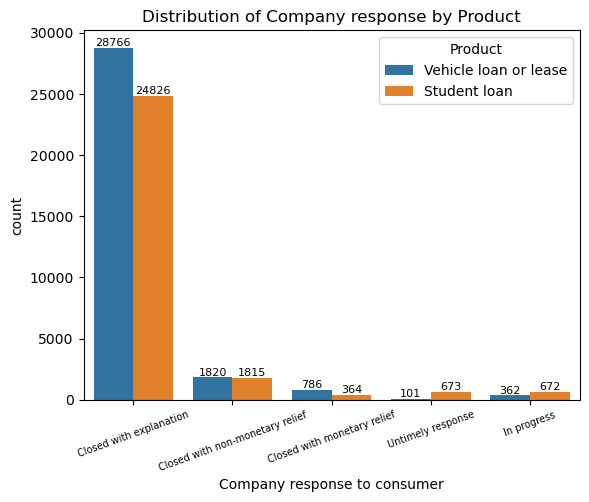

**Interpretation:** The majority of responses for both product types are 'Closed with explanation', indicating that companies often provide explanations to consumers without necessarily offering a resolution.

In [57]:
ax = sns.countplot(data = df, x = 'Company response to consumer',hue='Product')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=20,fontsize=7)
plt.title('Distribution of Company response by Product')
plt.show()
text = "**Interpretation:** The majority of responses for both product types are 'Closed with explanation', indicating that companies often provide explanations to consumers without necessarily offering a resolution."
display(Markdown(text))

### 16. Timely response

In [58]:
df['Timely response?'].value_counts()

Timely response?
Yes    58333
No      1852
Name: count, dtype: int64

 **Interpretation**:
1. The majority of complaints received a timely response, indicating that companies generally respond within the CFPB's
timeframe.
2. There's a slightly higher number of "Yes" responses for vehicle loans compared to student loans. This suggests that 
companies might be responding more promptly to vehicle loan complaints.

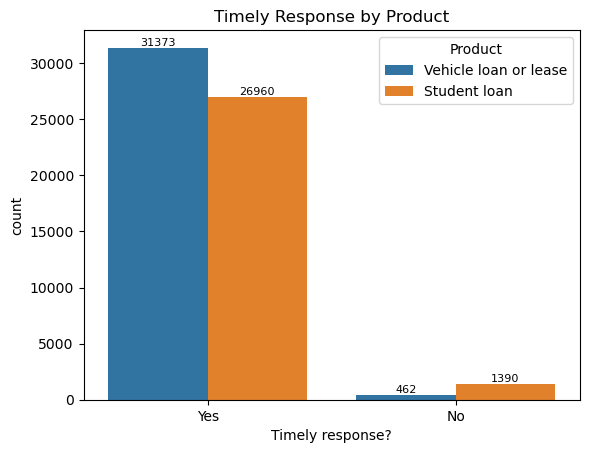

In [59]:
ax = sns.countplot(data = df, x = 'Timely response?',hue='Product')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.title("Timely Response by Product")
text=""" **Interpretation**:
1. The majority of complaints received a timely response, indicating that companies generally respond within the CFPB's
timeframe.
2. There's a slightly higher number of "Yes" responses for vehicle loans compared to student loans. This suggests that 
companies might be responding more promptly to vehicle loan complaints."""
display(Markdown(text))

# Step 6: Data Preprocessing

## Substep 1: Filtering the Dataset to Specific Issue Types 
- The dataset has been filtered to include only complaints related to 'Struggling to pay your loan' and 'Struggling to repay your loan'.
- The dataset now contains 8326 rows and 21 columns.
- Several columns have missing values, with 'Consumer complaint narrative' having the highest number of missing values (3866).

In [60]:
df[df['Issue']=='Struggling to repay your loan']['Product'].value_counts()
# Belongs to Student loan

Product
Student loan    4199
Name: count, dtype: int64

In [61]:
df[df['Issue']=='Struggling to pay your loan']['Product'].value_counts()
# Belongs to Vehicle loan

Product
Vehicle loan or lease    4127
Name: count, dtype: int64

In [62]:
df = df[(df['Issue'] == 'Struggling to pay your loan') | (df['Issue'] =='Struggling to repay your loan')]
df = df.reset_index()
df = df.drop(['index'],axis=1)
df.head(2)

Date received                Product                     Sub-product  \
0    2022-05-05  Vehicle loan or lease                            Loan   
1    2024-03-06           Student loan  Federal student loan servicing   

                           Issue  \
0    Struggling to pay your loan   
1  Struggling to repay your loan   

                                           Sub-issue  \
0  Problem after you declared or threatened to de...   
1  Problem with forgiveness, cancellation, or dis...   

                        Consumer complaint narrative Company public response  \
0  In XX/XX/2020, I filed bankruptcy. Capital One...                     NaN   
1  In accordance with the Fair Credit Reporting a...                     NaN   

                                 Company State ZIP code  ...  \
0      CAPITAL ONE FINANCIAL CORPORATION    IL    60644  ...   
1  Maximus Education, LLC dba Aidvantage    NE    68506  ...   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web           2022-05-05   
1           Consent provided           Web           2024-03-07   

  Company response to consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                NaN   
1      Closed with explanation              Yes                NaN   

   Complaint ID  Word_count  Char_count  Unique_word_count  
0       5543271       286.0      1652.0              167.0  
1       8472850       100.0       631.0               45.0  

[2 rows x 21 columns]

In [63]:
df.isnull().sum()

Date received                      0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                          0
Consumer complaint narrative    3866
Company public response         5026
Company                            0
State                             24
ZIP code                           9
Tags                            7134
Consumer consent provided?      1214
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?              8326
Complaint ID                       0
Word_count                      3866
Char_count                      3866
Unique_word_count               3866
dtype: int64

In [64]:
df.shape

(8326, 21)

## Substep 2: Selecting Columns for Model Building
- We have selected four columns for model building: 'Date received', 'Consumer complaint narrative', 'State', 'ZIP code', and 'Product'.
- The dataset after selecting these columns contains 8326 rows and 5 columns.
- Missing values are present in 'Consumer complaint narrative' (3866), 'State' (24), and 'ZIP code' (9).

In [65]:
df = df[['Date received','Consumer complaint narrative','State','ZIP code','Product']]
df.head()

Date received                       Consumer complaint narrative State  \
0    2022-05-05  In XX/XX/2020, I filed bankruptcy. Capital One...    IL   
1    2024-03-06  In accordance with the Fair Credit Reporting a...    NE   
2    2023-01-10  I attended a school in XXXX XXXX Texas XXXXXXX...    TX   
3    2023-01-10  When I took out this Parent Plus Loan in 2007 ...    MD   
4    2024-04-06  I have had Federal Student Loans for both my X...    RI   

  ZIP code                Product  
0    60644  Vehicle loan or lease  
1    68506           Student loan  
2    78251           Student loan  
3    21702           Student loan  
4    02905           Student loan

In [66]:
df[['Date received','Consumer complaint narrative','State','ZIP code','Product']].isnull().sum()

Date received                      0
Consumer complaint narrative    3866
State                             24
ZIP code                           9
Product                            0
dtype: int64

In [67]:
df.shape

(8326, 5)

## Substep 3: Handling missing values

### State

In [68]:
print(f"{df['State'].isnull().sum()} complaints have missing values in the State column.")

24 complaints have missing values in the State column.


In [69]:
df[df['State'].isna()]

Date received                       Consumer complaint narrative State  \
594     2024-06-20                                                NaN   NaN   
1118    2023-05-01  I am an American citizen who is doing XXXX sch...   NaN   
1682    2021-11-12  I am doing a XXXX XXXX XXXX in XXXX at an offi...   NaN   
1894    2023-08-09  Leased a vehicle, XXXX XXXX XXXX VIN # XXXX, o...   NaN   
2762    2023-10-24                                                NaN   NaN   
2804    2024-02-22                                                NaN   NaN   
2905    2023-01-29  Hi, In XXXX XXXX XXXXXXXX of XXXX, and XXXX, X...   NaN   
3235    2021-10-05  Summary of complaint : XXXX XXXX XXXX XXXX ( l...   NaN   
3571    2023-08-22  Edfinancial was designated as my student loan ...   NaN   
4493    2023-02-06  I took out my student loan for my graduate stu...   NaN   
4661    2024-02-16                                                NaN   NaN   
4701    2023-07-20                                                NaN   NaN   
5426    2021-12-02                                                NaN   NaN   
5704    2023-09-07                                                NaN   NaN   
5897    2021-08-23                                                NaN   NaN   
5939    2021-10-02                                                NaN   NaN   
5999    2022-04-21  This is a complaint about an active loan with ...   NaN   
6238    2021-08-27                                                NaN   NaN   
6854    2021-09-09                                                NaN   NaN   
7132    2024-01-26                                                NaN   NaN   
7235    2021-08-05                                                NaN   NaN   
7350    2024-02-14  I'm currently unable to pay my loan due to ext...   NaN   
7697    2021-08-05                                                NaN   NaN   
7884    2023-01-29  Hi, In XXXX and XXXX of XXXX, and XXXX, XXXX a...   NaN   

     ZIP code                Product  
594     XXXXX           Student loan  
1118    XXXXX           Student loan  
1682    XXXXX           Student loan  
1894    XXXXX  Vehicle loan or lease  
2762    XXXXX           Student loan  
2804    XXXXX           Student loan  
2905    XXXXX           Student loan  
3235    XXXXX           Student loan  
3571    XXXXX           Student loan  
4493    XXXXX           Student loan  
4661    XXXXX           Student loan  
4701    XXXXX  Vehicle loan or lease  
5426    XXXXX           Student loan  
5704    XXXXX           Student loan  
5897      NaN           Student loan  
5939    XXXXX           Student loan  
5999    19147           Student loan  
6238      NaN           Student loan  
6854      NaN           Student loan  
7132    XXXXX           Student loan  
7235      NaN           Student loan  
7350    XXXXX           Student loan  
7697      NaN  Vehicle loan or lease  
7884    XXXXX           Student loan

In [70]:
# Counting the ZIP codes where the State is missing but the ZIP code is present
text = """**Observation:**
1. Out of 24 complaints, 5 complaints have null values in the ZIP code column. 
2. Among the 19 complaints with null State values, 18 have a ZIP code of 'XXXXX,' while 1 complaint has a ZIP code of '19147.'
3. 21 complaints out of these null State value data belong to consumers with Student loan complaints."""
display(Markdown(text))
df[(df['State'].isna()) & (~df['ZIP code'].isna())]['ZIP code'].value_counts()

**Observation:**
1. Out of 24 complaints, 5 complaints have null values in the ZIP code column. 
2. Among the 19 complaints with null State values, 18 have a ZIP code of 'XXXXX,' while 1 complaint has a ZIP code of '19147.'
3. 21 complaints out of these null State value data belong to consumers with Student loan complaints.

ZIP code
XXXXX    18
19147     1
Name: count, dtype: int64

In [71]:
#top 3 states for complaints with ZIP code 'XXXXX'
text = """**Observation:** Most complaints with a ZIP code of 'XXXXX' originate from the state of 'CA'."""
display(Markdown(text))
df[df['ZIP code']=='XXXXX']['State'].value_counts()[:3]

**Observation:** Most complaints with a ZIP code of 'XXXXX' originate from the state of 'CA'.

State
CA    27
GA    16
FL    14
Name: count, dtype: int64

In [72]:
print("Filling the missing values in State column with 'CA'")
print()
df['State'] = df['State'].fillna('CA')
print(f"Remaining missing values in the State column: {df['State'].isnull().sum()}")

Filling the missing values in State column with 'CA'

Remaining missing values in the State column: 0


###  ZIP code

In [73]:
print(f"There are {df['ZIP code'].isnull().sum()} complaints with missing ZIP code entries.") 

There are 9 complaints with missing ZIP code entries.


In [74]:
text = """States associated with the missing ZIP codes:"""
print(text)
df[df['ZIP code'].isna()]['State'].value_counts()

States associated with the missing ZIP codes:


State
CA    5
KY    1
MS    1
OR    1
NC    1
Name: count, dtype: int64

In [75]:
df[(df['ZIP code'].isna())]

Date received Consumer complaint narrative State ZIP code  \
2016    2023-11-09                          NaN    KY      NaN   
3944    2023-10-30                          NaN    MS      NaN   
5897    2021-08-23                          NaN    CA      NaN   
6238    2021-08-27                          NaN    CA      NaN   
6554    2022-08-25                          NaN    OR      NaN   
6854    2021-09-09                          NaN    CA      NaN   
7235    2021-08-05                          NaN    CA      NaN   
7697    2021-08-05                          NaN    CA      NaN   
8223    2022-11-25                          NaN    NC      NaN   

                    Product  
2016           Student loan  
3944           Student loan  
5897           Student loan  
6238           Student loan  
6554           Student loan  
6854           Student loan  
7235           Student loan  
7697  Vehicle loan or lease  
8223  Vehicle loan or lease

In [76]:
# Finding mode of ZIP code for each State
text = """The most frequently occurring ZIP code for each state:"""
print(text)
state_zip_modes = df.groupby(['State'])['ZIP code'].apply(lambda x: x.mode()[0])
#as there can be more than 1 mode present choosing the first mode
state_zip_modes[:10]

The most frequently occurring ZIP code for each state:


State
AE    09096
AK    995XX
AL    360XX
AP    XXXXX
AR    XXXXX
AZ    857XX
CA    XXXXX
CO    80920
CT    068XX
DC    20001
Name: ZIP code, dtype: object

In [77]:
print("Replaced missing ZIP codes with the most frequent ZIP code for each state.")
df['ZIP code'] = df.apply(lambda x: state_zip_modes[x['State']] if pd.isnull(x['ZIP code']) else x['ZIP code'],axis=1)
print()
print(f"Remaining missing values in the ZIP code column: {df['ZIP code'].isnull().sum()}")

Replaced missing ZIP codes with the most frequent ZIP code for each state.

Remaining missing values in the ZIP code column: 0


### Consumer complaint narrative

In [78]:
print(f"There are {df['Consumer complaint narrative'].isnull().sum()} complaints with missing consumer complaint narrative") 

There are 3866 complaints with missing consumer complaint narrative


In [79]:
missing_comp = df[df['Consumer complaint narrative'].isnull()]['Product'].value_counts()
missing_comp

Product
Student loan             2130
Vehicle loan or lease    1736
Name: count, dtype: int64

**Interpretation**:
The number of missing complaint narratives is relatively balanced between both types of loans, with Student loan at 55.10% and 
Vehicle loan or lease at 44.90%. Therefore, we will drop these records for cleaner data.

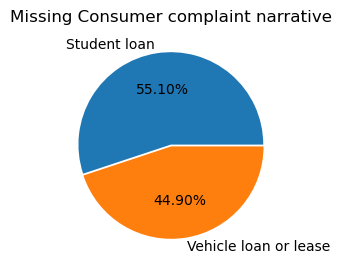

In [80]:
plt.figure(figsize=(4,3))
plt.title('Missing Consumer complaint narrative')
plt.pie(missing_comp,labels=missing_comp.index,autopct = '%.2f%%',explode=[0.01,0.01])
text = """**Interpretation**:
The number of missing complaint narratives is relatively balanced between both types of loans, with Student loan at 55.10% and 
Vehicle loan or lease at 44.90%. Therefore, we will drop these records for cleaner data."""
display(Markdown(text))

In [81]:
df = df.dropna() # with dropped null entries and no engineered features
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [82]:
df.isnull().sum()

Date received                   0
Consumer complaint narrative    0
State                           0
ZIP code                        0
Product                         0
dtype: int64

In [83]:
df.shape

(4460, 5)

## Substep 4: Dropping Duplicates

In [84]:
print(f"Number of duplicate records found: {df[df.duplicated(keep=False)].shape[0]}") 

Number of duplicate records found: 4


In [85]:
df.drop_duplicates(inplace=True,ignore_index=True)
print(f"Shape of the DataFrame after dropping duplicates: {df.shape}")

Shape of the DataFrame after dropping duplicates: (4458, 5)


## Substep 5: Renaming the columns

In [86]:
df.rename(columns={'Date received':'Date','Consumer complaint narrative':'Complaint','Product':'Loan'},inplace=True)

In [87]:
df

Date                                          Complaint State  \
0    2022-05-05  In XX/XX/2020, I filed bankruptcy. Capital One...    IL   
1    2024-03-06  In accordance with the Fair Credit Reporting a...    NE   
2    2023-01-10  I attended a school in XXXX XXXX Texas XXXXXXX...    TX   
3    2023-01-10  When I took out this Parent Plus Loan in 2007 ...    MD   
4    2024-04-06  I have had Federal Student Loans for both my X...    RI   
...         ...                                                ...   ...   
4453 2022-04-23  XX/XX/2020 3 vehicles were to be sold by my Po...    GA   
4454 2022-10-01  FEDLOAN SERVICING LAST REPORTED XX/XX/2022 {$1...    TX   
4455 2022-11-27  It started in XXXX, with Sallie Mae, when I wa...    PA   
4456 2022-06-22  I opened loans with Sallie Mae from XXXX. Once...    FL   
4457 2022-02-09  I would like to submit this complaint regardin...    MI   

     ZIP code                   Loan  
0       60644  Vehicle loan or lease  
1       68506           Student loan  
2       78251           Student loan  
3       21702           Student loan  
4       02905           Student loan  
...       ...                    ...  
4453    30214  Vehicle loan or lease  
4454    79915           Student loan  
4455    155XX           Student loan  
4456    33615           Student loan  
4457    48532           Student loan  

[4458 rows x 5 columns]

## Substep 6:  Encoding the target variable

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Loan'] = encoder.fit_transform(df['Loan'])
print(df.head())
print("Loan encoding: Vehicle loan = 1, Student loan = 0")

        Date                                          Complaint State  \
0 2022-05-05  In XX/XX/2020, I filed bankruptcy. Capital One...    IL   
1 2024-03-06  In accordance with the Fair Credit Reporting a...    NE   
2 2023-01-10  I attended a school in XXXX XXXX Texas XXXXXXX...    TX   
3 2023-01-10  When I took out this Parent Plus Loan in 2007 ...    MD   
4 2024-04-06  I have had Federal Student Loans for both my X...    RI   

  ZIP code  Loan  
0    60644     1  
1    68506     0  
2    78251     0  
3    21702     0  
4    02905     0  
Loan encoding: Vehicle loan = 1, Student loan = 0


# Step 7: Text Preprocessing

- Removing Masked Characters and Digits
- Lowercasing
- Tokenization
- Removing Non-Alphanumeric characters 
- Removing Stopwords and Punctuation
- Lemmatization: Converts words to their root form (e.g., 'dancing' to 'dance') to reduce variations of the same word.

In [89]:
import re
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [90]:
def cleaning_text(text):
    text = re.sub(r'XX*','',text)   # Remove masked characters (e.g., 'XXXX')
    text = re.sub(r'\d','',text)    # Remove digits
    text = text.lower()             # Convert text to lower case
    text = nltk.word_tokenize(text) # Tokenize the text
    
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)          # Remove non-alphanumeric tokens
    
    text = y[:]                     # Remove stopwords and punctuation
    y.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()
    lemma = WordNetLemmatizer()    # Lemmatize the words
    for word in text:
        y.append(lemma.lemmatize(word)) 
             
    return " ".join(y)

In [91]:
df['Complaint'][100]

'The car I was buying was only worth at the most {$6000.00} in the shape it was in probably more like XXXX. They knowingly acted in violation of the California usury law title 15 when they charged me 28 % APR. At the end of 4 years without an option to refinance or even an offer by the company I will have paid well over XXXX to XXXX for a XXXX or {$5000.00} car. They repossessed the car at 72 days late instead of the normal 90 days. They committed a crime in order to scan me for money using an outrageous APR I would like to see every cent that I put into that car that they pretty much stole back for me put back in my pocket and I would like to see those XXXX go to XXXX'

In [92]:
cleaning_text(df['Complaint'][100])

'car buying worth shape probably like knowingly acted violation california usury law title charged apr end year without option refinance even offer company paid well car repossessed car day late instead normal day committed crime order scan money using outrageous apr would like see every cent put car pretty much stole back put back pocket would like see go'

In [93]:
df['Complaint_narrative'] = df['Complaint'].apply(cleaning_text)
df.head()

Date                                          Complaint State  \
0 2022-05-05  In XX/XX/2020, I filed bankruptcy. Capital One...    IL   
1 2024-03-06  In accordance with the Fair Credit Reporting a...    NE   
2 2023-01-10  I attended a school in XXXX XXXX Texas XXXXXXX...    TX   
3 2023-01-10  When I took out this Parent Plus Loan in 2007 ...    MD   
4 2024-04-06  I have had Federal Student Loans for both my X...    RI   

  ZIP code  Loan                                Complaint_narrative  
0    60644     1  filed bankruptcy capital one listed bankruptcy...  
1    68506     0  accordance fair credit reporting act account c...  
2    78251     0  attended school texas got graphic design upon ...  
3    21702     0  took parent plus loan sallie mae amount intere...  
4    02905     0  federal student loan education began paying mo...

In [94]:
### Dropping the column 'Complaint'
df.drop(columns=['Complaint'],axis=0,inplace=True)

In [95]:
df.head()

Date State ZIP code  Loan  \
0 2022-05-05    IL    60644     1   
1 2024-03-06    NE    68506     0   
2 2023-01-10    TX    78251     0   
3 2023-01-10    MD    21702     0   
4 2024-04-06    RI    02905     0   

                                 Complaint_narrative  
0  filed bankruptcy capital one listed bankruptcy...  
1  accordance fair credit reporting act account c...  
2  attended school texas got graphic design upon ...  
3  took parent plus loan sallie mae amount intere...  
4  federal student loan education began paying mo...

## Step 8: Text Visualization

### Student loan = 0 

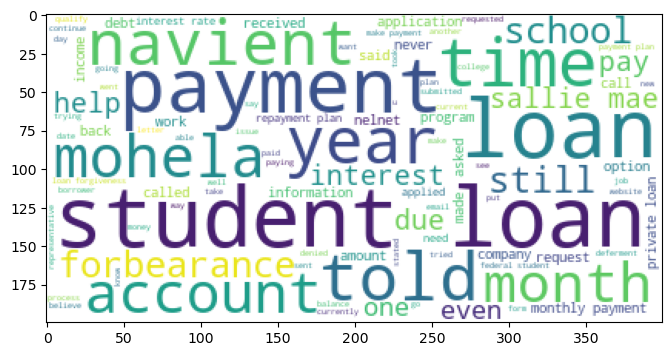

In [96]:
wc = WordCloud(background_color='white')
stud_loan = wc.generate(df[df['Loan']==0]['Complaint_narrative'].str.cat(sep=" "))
plt.figure(figsize=(8,4))
plt.imshow(stud_loan)

In [97]:
stud_corpus = []
complaints = df[df['Loan']==0]['Complaint_narrative'].tolist()
for complaint in complaints:
    for word in complaint.split():
        stud_corpus.append(word)
print(f"{len(stud_corpus)} is the number of words in the Student loan vocabulary")

189032 is the number of words in the Student loan vocabulary


In [98]:
from collections import Counter
Counter(stud_corpus).most_common(10)

[('loan', 7602),
 ('payment', 4441),
 ('student', 2270),
 ('time', 1903),
 ('would', 1704),
 ('year', 1510),
 ('month', 1434),
 ('navient', 1418),
 ('pay', 1319),
 ('interest', 1303)]

In [99]:
text = """**Observations:**
The word 'loan' is the most frequent word, appearing 7602 times in student loan complaints.
Other common words include 'payment,' 'student,' 'time,' 'year,' and 'navient.'"""
display(Markdown(text))
pd.DataFrame(Counter(stud_corpus).most_common(10))

**Observations:**
The word 'loan' is the most frequent word, appearing 7602 times in student loan complaints.
Other common words include 'payment,' 'student,' 'time,' 'year,' and 'navient.'

0     1
0      loan  7602
1   payment  4441
2   student  2270
3      time  1903
4     would  1704
5      year  1510
6     month  1434
7   navient  1418
8       pay  1319
9  interest  1303

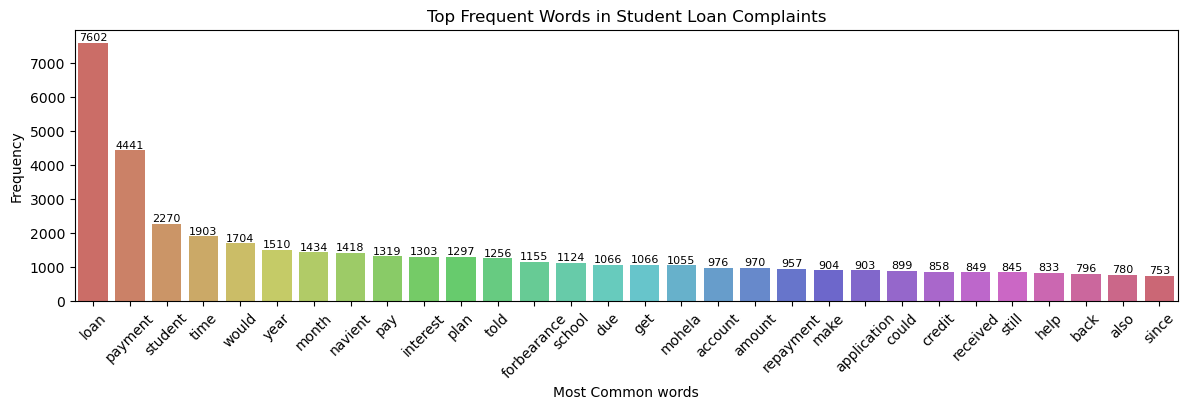

In [100]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x=pd.DataFrame(Counter(stud_corpus).most_common(30))[0],y=pd.DataFrame(Counter(stud_corpus).most_common(30))[1], palette='hls')
plt.xticks(rotation=45)
plt.tight_layout()
for i in range(30):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.xlabel('Most Common words')
plt.ylabel('Frequency')
plt.title('Top Frequent Words in Student Loan Complaints')
plt.show()

### Vehicle loan = 1

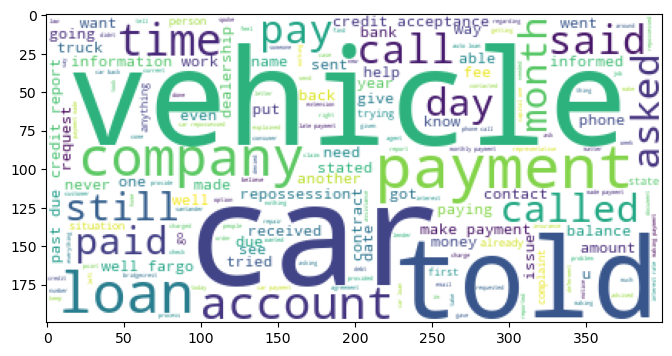

In [101]:
vehicle_loan = wc.generate(df[df['Loan']==1]['Complaint_narrative'].str.cat(sep=" "))
plt.figure(figsize=(8,4))
plt.imshow(vehicle_loan)

In [102]:
vehicle_corpus = []
complaints = df[df['Loan']==1]['Complaint_narrative'].tolist()
for complaint in complaints:
    for word in complaint.split():
        vehicle_corpus.append(word)
len(vehicle_corpus)
print(f"{len(vehicle_corpus)} is the number of words in the Vehicle loan vocabulary")

240542 is the number of words in the Vehicle loan vocabulary


In [103]:
text="""**Observations:**
The word 'payment' is the most frequent word, appearing 5623 times in vehicle loan complaints.
Other common words include 'car,' 'vehicle,' 'credit,' 'loan,' and 'account.'"""
display(Markdown(text))
pd.DataFrame(Counter(vehicle_corpus).most_common(10))

**Observations:**
The word 'payment' is the most frequent word, appearing 5623 times in vehicle loan complaints.
Other common words include 'car,' 'vehicle,' 'credit,' 'loan,' and 'account.'

0     1
0  payment  5623
1      car  4627
2  vehicle  3378
3   credit  2461
4     loan  2315
5    would  2039
6     told  1899
7  account  1894
8     time  1866
9      get  1748

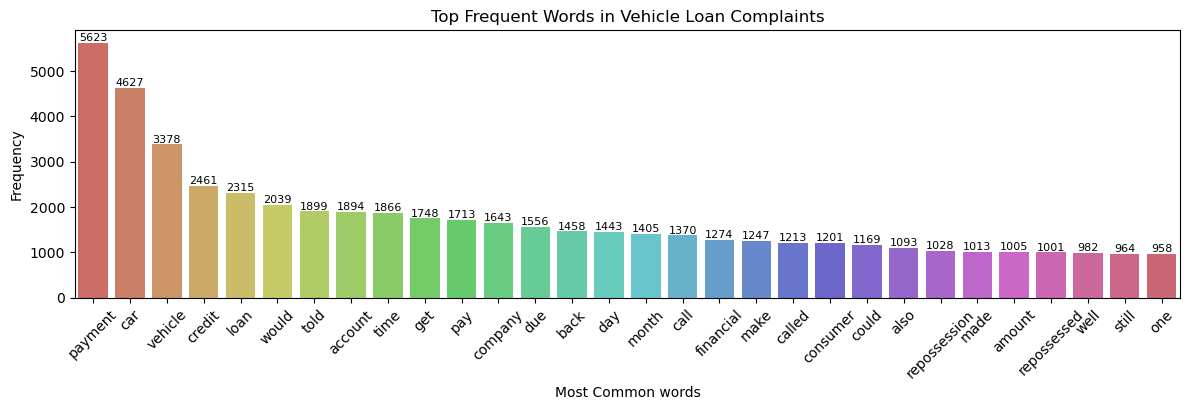

In [104]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x=pd.DataFrame(Counter(vehicle_corpus).most_common(30))[0],y=pd.DataFrame(Counter(vehicle_corpus).most_common(30))[1], palette='hls')
plt.xticks(rotation=45)
plt.tight_layout()
for i in range(30):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.xlabel('Most Common words')
plt.ylabel('Frequency')
plt.title('Top Frequent Words in Vehicle Loan Complaints')
plt.show()

### Final preprocessed data 

In [105]:
df 

Date State ZIP code  Loan  \
0    2022-05-05    IL    60644     1   
1    2024-03-06    NE    68506     0   
2    2023-01-10    TX    78251     0   
3    2023-01-10    MD    21702     0   
4    2024-04-06    RI    02905     0   
...         ...   ...      ...   ...   
4453 2022-04-23    GA    30214     1   
4454 2022-10-01    TX    79915     0   
4455 2022-11-27    PA    155XX     0   
4456 2022-06-22    FL    33615     0   
4457 2022-02-09    MI    48532     0   

                                    Complaint_narrative  
0     filed bankruptcy capital one listed bankruptcy...  
1     accordance fair credit reporting act account c...  
2     attended school texas got graphic design upon ...  
3     took parent plus loan sallie mae amount intere...  
4     federal student loan education began paying mo...  
...                                                 ...  
4453  vehicle sold power attorney later referring po...  
4454                    fedloan servicing last reported  
4455  started sallie mae attending school defer due ...  
4456  opened loan sallie mae graduated university ca...  
4457  would like submit complaint regarding personal...  

[4458 rows x 5 columns]

In [106]:
df['Loan'].value_counts()
#Vehicle Loan (1): 2389 complaints
#Student Loan (0): 2069 complaints

Loan
1    2389
0    2069
Name: count, dtype: int64

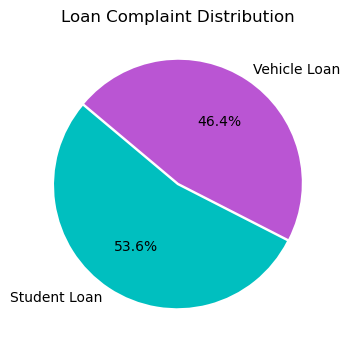

In [107]:
loan_counts = df['Loan'].value_counts()
labels = ['Student Loan', 'Vehicle Loan']
colors = ['c', 'mediumorchid']
plt.figure(figsize=(4,4))
plt.pie(loan_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0.01, 0.01], startangle=140)
plt.title('Loan Complaint Distribution')
plt.show()
# Balanced data and Student loan complaints are slightly higher than Vehicle loan

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4458 non-null   datetime64[ns]
 1   State                4458 non-null   object        
 2   ZIP code             4458 non-null   object        
 3   Loan                 4458 non-null   int32         
 4   Complaint_narrative  4458 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 156.9+ KB


**Interpretation**:
The sampled data captures the overall trend in the complete dataset

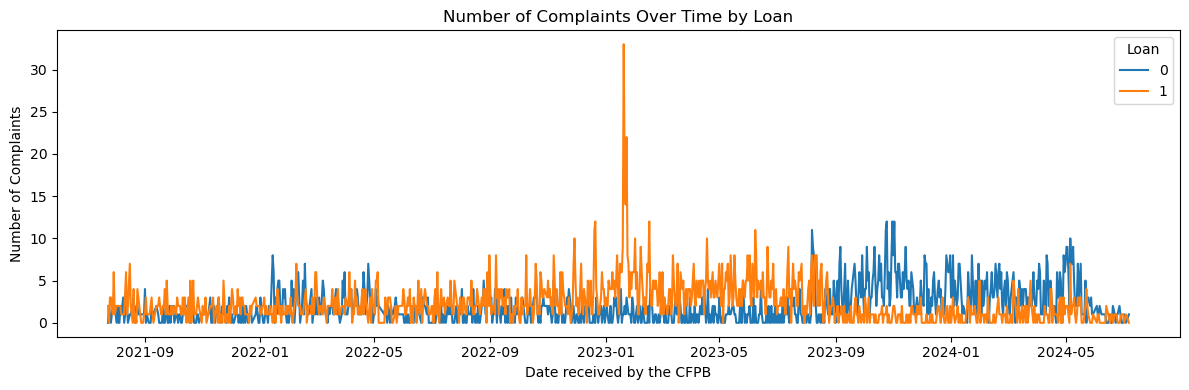

In [109]:
product_complaints = df.pivot_table(index='Date', columns='Loan', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 4))
for product in product_complaints.columns:
    sns.lineplot(data=product_complaints, x=product_complaints.index, y=product, label=product)

plt.title('Number of Complaints Over Time by Loan')
plt.xlabel('Date received by the CFPB')
plt.ylabel('Number of Complaints')
plt.legend(title='Loan')
plt.tight_layout()

text = """**Interpretation**:
The sampled data captures the overall trend in the complete dataset"""
display(Markdown(text))

# Step 9: Model Building

In [110]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,precision_score,classification_report, roc_curve, auc

## Model : With basic features

In [111]:
df1 = df.copy()
df1.head()

Date State ZIP code  Loan  \
0 2022-05-05    IL    60644     1   
1 2024-03-06    NE    68506     0   
2 2023-01-10    TX    78251     0   
3 2023-01-10    MD    21702     0   
4 2024-04-06    RI    02905     0   

                                 Complaint_narrative  
0  filed bankruptcy capital one listed bankruptcy...  
1  accordance fair credit reporting act account c...  
2  attended school texas got graphic design upon ...  
3  took parent plus loan sallie mae amount intere...  
4  federal student loan education began paying mo...

### Encoding the features - df1

In [112]:
# Encoding the date feature
df1['Date'] = df1['Date'].apply(lambda x: x.toordinal())
#The function returns the ordinal value for the given DateTime object.

In [113]:
#Onehotencoding the nominal categorical variables
ohe = OneHotEncoder(sparse_output = False)
zip_state_encoded = ohe.fit_transform(df1[['State','ZIP code']])
zip_state_encoded_df = pd.DataFrame(zip_state_encoded, columns=ohe.get_feature_names_out(['State','ZIP code']))
zip_state_encoded_df

State_AK  State_AL  State_AP  State_AR  State_AZ  State_CA  State_CO  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
4453       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4454       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4455       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4456       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4457       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      State_CT  State_DC  State_DE  ...  ZIP code_99208  ZIP code_99224  \
0          0.0       0.0       0.0  ...             0.0             0.0   
1          0.0       0.0       0.0  ...             0.0             0.0   
2          0.0       0.0       0.0  ...             0.0             0.0   
3          0.0       0.0       0.0  ...             0.0             0.0   
4          0.0       0.0       0.0  ...             0.0             0.0   
...        ...       ...       ...  ...             ...             ...   
4453       0.0       0.0       0.0  ...             0.0             0.0   
4454       0.0       0.0       0.0  ...             0.0             0.0   
4455       0.0       0.0       0.0  ...             0.0             0.0   
4456       0.0       0.0       0.0  ...             0.0             0.0   
4457       0.0       0.0       0.0  ...             0.0             0.0   

      ZIP code_99301  ZIP code_993XX  ZIP code_995XX  ZIP code_99645  \
0                0.0             0.0             0.0             0.0   
1                0.0             0.0             0.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
4453             0.0             0.0             0.0             0.0   
4454             0.0             0.0             0.0             0.0   
4455             0.0             0.0             0.0             0.0   
4456             0.0             0.0             0.0             0.0   
4457             0.0             0.0             0.0             0.0   

      ZIP code_996XX  ZIP code_997XX  ZIP code_99801  ZIP code_XXXXX  
0                0.0             0.0             0.0             0.0  
1                0.0             0.0             0.0             0.0  
2                0.0             0.0             0.0             0.0  
3                0.0             0.0             0.0             0.0  
4                0.0             0.0             0.0             0.0  
...              ...             ...             ...             ...  
4453             0.0             0.0             0.0             0.0  
4454             0.0             0.0             0.0             0.0  
4455             0.0             0.0             0.0             0.0  
4456             0.0             0.0             0.0             0.0  
4457             0.0             0.0             0.0             0.0  

[4458 rows x 2681 columns]

In [114]:
# Encoding the date feature
df1 = pd.concat([df1, zip_state_encoded_df], axis=1)
df1.drop(['State','ZIP code'], axis=1, inplace=True)

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Columns: 2684 entries, Date to ZIP code_XXXXX
dtypes: float64(2681), int32(1), int64(1), object(1)
memory usage: 91.3+ MB


### Text Vectorization

In [116]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_features = tfidf_vectorizer.fit_transform(df1['Complaint_narrative'])
tfidf_features = tfidf_features.toarray()
tfidf_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.08191487, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03105153, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Splitting the data

In [117]:
numerical_columns = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'Loan']
print(numerical_columns)

['Date', 'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_PR', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 'ZIP code_00667', 'ZIP code_00754', 'ZIP code_007XX', 'ZIP code_00926', 'ZIP code_00956', 'ZIP code_01089', 'ZIP code_010XX', 'ZIP code_01109', 'ZIP code_011XX', 'ZIP code_01201', 'ZIP code_012XX', 'ZIP code_013XX', 'ZIP code_01440', 'ZIP code_014XX', 'ZIP code_015XX', 'ZIP code_01602', 'ZIP code_01604', 'ZIP code_01610', 'ZIP code_016XX', '

In [118]:
numerical_features = df1[numerical_columns].values

In [119]:
X = np.concatenate((numerical_features, tfidf_features),axis=1)
y = df1['Loan']

In [120]:
print(f"Labels = {pd.unique(y)}")
print(f"Total records =  {len(X)}")

Labels = [1 0]
Total records =  4458


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"Total training records = {len(X_train)}")
print(f"Total testing records = {len(X_test)}")

Total training records = 3343
Total testing records = 1115


## Logistic Regression - df1

In [122]:
lr=LogisticRegression()
lr.fit(X_train, y_train)  

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print()
print("Accuracy: ",accuracy_score(y_test,y_pred))
print()
print("Precision: ",precision_score(y_test,y_pred))
print()
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred))
print()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       506
           1       0.94      0.96      0.95       609

    accuracy                           0.94      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.94      0.94      0.94      1115


Accuracy:  0.9434977578475336

Precision:  0.9403225806451613

Confusion Matrix: 
 [[469  37]
 [ 26 583]]

AUC: 0.984361715246273


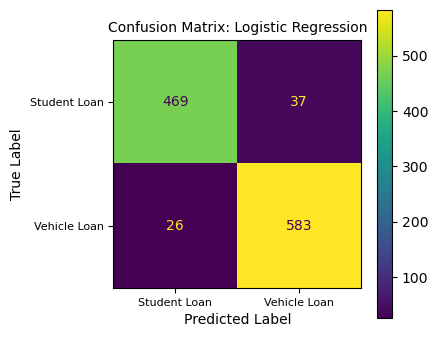

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(4, 4)) 
disp.plot(ax=ax)
ax.set_xticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_yticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_title('Confusion Matrix: Logistic Regression', fontsize=10)
ax.set_xlabel('Predicted Label', fontsize=10)
ax.set_ylabel('True Label', fontsize=10)
plt.show()

## Random Forest - df1

In [124]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)

y_pred1 = rfc.predict(X_test)
y_prob1 = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred1))
print()
print("Accuracy: ",accuracy_score(y_test,y_pred1))
print()
print("Precision: ",precision_score(y_test,y_pred1))
print()
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred1))
print()


fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       506
           1       0.96      0.97      0.97       609

    accuracy                           0.96      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115


Accuracy:  0.9632286995515695

Precision:  0.961038961038961

Confusion Matrix: 
 [[482  24]
 [ 17 592]]

AUC: 0.9953351246454695


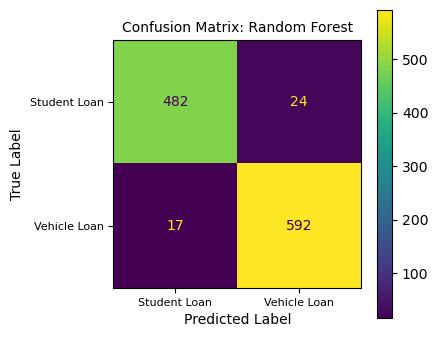

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred1))
fig, ax = plt.subplots(figsize=(4, 4)) 
disp.plot(ax=ax)
ax.set_xticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_yticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_title('Confusion Matrix: Random Forest', fontsize=10)
ax.set_xlabel('Predicted Label', fontsize=10)
ax.set_ylabel('True Label', fontsize=10)
plt.show()

**Interpretation of Model Performance with Raw Data:**

1. **Logistic Regression:**
    - Accuracy: 94.35%
    - Precision: 94.03%
    - Confusion Matrix:
           - True Positives (TP): 583 (correctly identified vehicle loans)
           - False Positives (FP): 37 (student loans incorrectly identified as vehicle loans)
           - True Negatives (TN): 469 (correctly identified student loans)
           - False Negatives (FN): 26 (vehicle loans incorrectly identified as student loans)
           
    - Recall: This indicates that the model correctly identifies 93% of actual student loan complaints and 96% of actual vehicle loan complaints.
    - F1-Score: The F1-score for class 1 is 95%, which balances the precision and recall.
    - AUC: The Area Under the ROC Curve (AUC) is 0.984, indicating excellent model performance in distinguishing between the two classes.
    
    
2. **Random Forest Classifier (RFC):**
    - Accuracy: 96.32%
    - Precision: 96.10%
    - Confusion Matrix:
           - True Positives (TP): 592 (correctly identified vehicle loans)
           - False Positives (FP): 24 (student loans incorrectly identified as vehicle loans)
           - True Negatives (TN): 482 (correctly identified student loans)
           - False Negatives (FN): 17 (vehicle loans incorrectly identified as student loans)
    - Recall: This indicates that the model correctly identifies 95% of actual student loan complaints and 97% of actual vehicle loan complaints.
    - F1-Score: The F1-score for class 1 is 97%, indicating that the model balances precision and recall.
    - AUC: The Area Under the ROC Curve (AUC) is 0.995, indicating excellent model performance in distinguishing between the two classes.
    
3. **Analysis:**
Both Logistic Regression and Random Forest models demonstrate strong performance in classifying student loan and vehicle loan complaints. However, Random Forest outperforms Logistic Regression in several key metrics, including accuracy, precision, recall, and AUC.

## Model : With Feature Engineering

In [126]:
df2 =  df.copy()
df2

Date State ZIP code  Loan  \
0    2022-05-05    IL    60644     1   
1    2024-03-06    NE    68506     0   
2    2023-01-10    TX    78251     0   
3    2023-01-10    MD    21702     0   
4    2024-04-06    RI    02905     0   
...         ...   ...      ...   ...   
4453 2022-04-23    GA    30214     1   
4454 2022-10-01    TX    79915     0   
4455 2022-11-27    PA    155XX     0   
4456 2022-06-22    FL    33615     0   
4457 2022-02-09    MI    48532     0   

                                    Complaint_narrative  
0     filed bankruptcy capital one listed bankruptcy...  
1     accordance fair credit reporting act account c...  
2     attended school texas got graphic design upon ...  
3     took parent plus loan sallie mae amount intere...  
4     federal student loan education began paying mo...  
...                                                 ...  
4453  vehicle sold power attorney later referring po...  
4454                    fedloan servicing last reported  
4455  started sallie mae attending school defer due ...  
4456  opened loan sallie mae graduated university ca...  
4457  would like submit complaint regarding personal...  

[4458 rows x 5 columns]

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4458 non-null   datetime64[ns]
 1   State                4458 non-null   object        
 2   ZIP code             4458 non-null   object        
 3   Loan                 4458 non-null   int32         
 4   Complaint_narrative  4458 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 156.9+ KB


### Feature Engineering

In [128]:
#num of characters
df2['Char_count'] = df2['Complaint_narrative'].apply(len)
# num of words
df2['Word_count'] = df2['Complaint_narrative'].apply(lambda x:len(nltk.word_tokenize(x)))
# num of sentences
df2['Sent_count'] = df2['Complaint_narrative'].apply(lambda x:len(nltk.sent_tokenize(x)))
# Temporal Features from Date
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day
df2['DayOfWeek'] = df2['Date'].dt.dayofweek
df2.head()

Date State ZIP code  Loan  \
0 2022-05-05    IL    60644     1   
1 2024-03-06    NE    68506     0   
2 2023-01-10    TX    78251     0   
3 2023-01-10    MD    21702     0   
4 2024-04-06    RI    02905     0   

                                 Complaint_narrative  Char_count  Word_count  \
0  filed bankruptcy capital one listed bankruptcy...        1011         133   
1  accordance fair credit reporting act account c...         171          24   
2  attended school texas got graphic design upon ...         465          68   
3  took parent plus loan sallie mae amount intere...         488          73   
4  federal student loan education began paying mo...        9154        1294   

   Sent_count  Year  Month  Day  DayOfWeek  
0           1  2022      5    5          3  
1           1  2024      3    6          2  
2           1  2023      1   10          1  
3           1  2023      1   10          1  
4           1  2024      4    6          5

In [129]:
df2.describe(include='all')

Date State ZIP code         Loan  \
count                            4458  4458     4458  4458.000000   
unique                            NaN    54     2627          NaN   
top                               NaN    CA    XXXXX          NaN   
freq                              NaN   408      193          NaN   
mean    2023-02-27 01:42:23.741588224   NaN      NaN     0.535891   
min               2021-07-24 00:00:00   NaN      NaN     0.000000   
25%               2022-07-27 00:00:00   NaN      NaN     0.000000   
50%               2023-03-16 00:00:00   NaN      NaN     1.000000   
75%               2023-10-20 00:00:00   NaN      NaN     1.000000   
max               2024-07-07 00:00:00   NaN      NaN     1.000000   
std                               NaN   NaN      NaN     0.498766   

                                      Complaint_narrative    Char_count  \
count                                                4458   4458.000000   
unique                                               4448           NaN   
top     accordance fair credit reporting act account v...           NaN   
freq                                                    3           NaN   
mean                                                  NaN    685.516599   
min                                                   NaN      8.000000   
25%                                                   NaN    248.000000   
50%                                                   NaN    471.000000   
75%                                                   NaN    832.000000   
max                                                   NaN  17923.000000   
std                                                   NaN    831.804667   

         Word_count  Sent_count         Year        Month          Day  \
count   4458.000000      4458.0  4458.000000  4458.000000  4458.000000   
unique          NaN         NaN          NaN          NaN          NaN   
top             NaN         NaN          NaN          NaN          NaN   
freq            NaN         NaN          NaN          NaN          NaN   
mean      96.360251         1.0  2022.686406     6.175415    15.763571   
min        1.000000         1.0  2021.000000     1.000000     1.000000   
25%       36.000000         1.0  2022.000000     3.000000     8.000000   
50%       67.000000         1.0  2023.000000     6.000000    16.000000   
75%      118.000000         1.0  2023.000000     9.000000    23.000000   
max     2306.000000         1.0  2024.000000    12.000000    31.000000   
std      112.336244         0.0     0.847014     3.572287     8.757250   

          DayOfWeek  
count   4458.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       2.578735  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max        6.000000  
std        1.838978

In [130]:
for col in ['Char_count','Word_count','Sent_count']:
    print(col,':',df2[col].nunique())
print()
print("Dropping the 'Sent_count' column as it has a single unique value")
df2 = df2.drop(columns=['Sent_count'])

Char_count : 1552
Word_count : 421
Sent_count : 1

Dropping the 'Sent_count' column as it has a single unique value


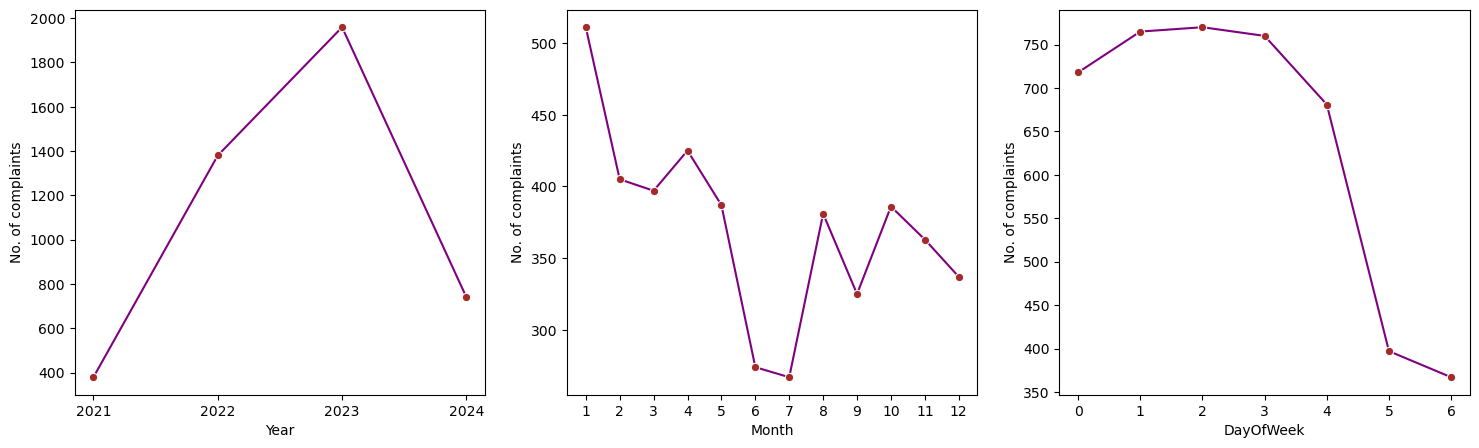

In [131]:
fig = plt.figure(figsize=(18, 5))

fig.add_subplot(1, 3, 1)
sns.lineplot(df2['Year'].value_counts(), marker='o',color='purple', markerfacecolor='brown')
plt.ylabel('No. of complaints')
plt.xticks(np.arange(2021,2025))

fig.add_subplot(1, 3, 2)
sns.lineplot(df2['Month'].value_counts(), marker='o',color='purple', markerfacecolor='brown')
plt.ylabel('No. of complaints')
plt.xticks(np.arange(1,13))

fig.add_subplot(1, 3, 3)
sns.lineplot(df2['DayOfWeek'].value_counts(), marker='o',color='purple', markerfacecolor='brown')
plt.ylabel('No. of complaints')
plt.xticks(np.arange(0,7))

plt.show()

**Observations:** 
1. The year 2023 saw the highest volume of complaints, while 2021 saw the fewest.
2. January experienced the highest number of complaints, while June and July saw the fewest.
3. Tuesdays saw the most complaints, while Sundays saw the fewest.

In [132]:
df2.groupby(['Year', 'Month'])['Date'].count().reset_index(name='Complaint_Count').head()

Year  Month  Complaint_Count
0  2021      7               28
1  2021      8               73
2  2021      9               66
3  2021     10               74
4  2021     11               65

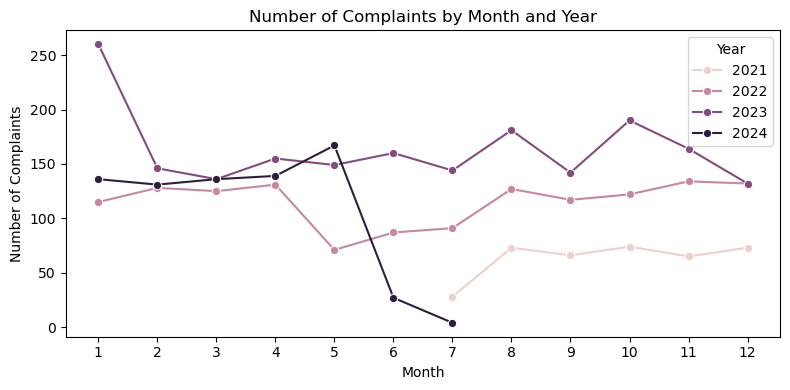

In [133]:
grouped_data = df2.groupby(['Year', 'Month'])['Date'].count().reset_index(name='Complaint_Count')
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Complaint_Count', hue='Year', data=grouped_data, marker='o')
plt.title('Number of Complaints by Month and Year')
plt.xticks(np.arange(1,13)),
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

**Interpretation:**
1. There is a clear rising trend in the number of complaints from 2021 to 2023, highlighting an increase in consumer issues or awareness.
2. The year 2022 shows a relatively stable trend with slight increases and decreases, indicating a consistent rate of complaints throughout the year.
3.  The significant peak in January 2023 followed by a decline suggests a seasonal pattern, possibly related to post-holiday financial adjustments.
4. The dramatic drop in complaints in June 2024 and the lowest count in July indicate a possible seasonal effect or resolution of major issues.

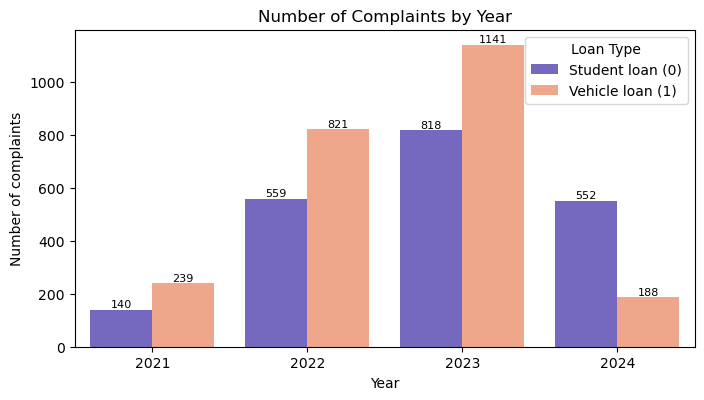

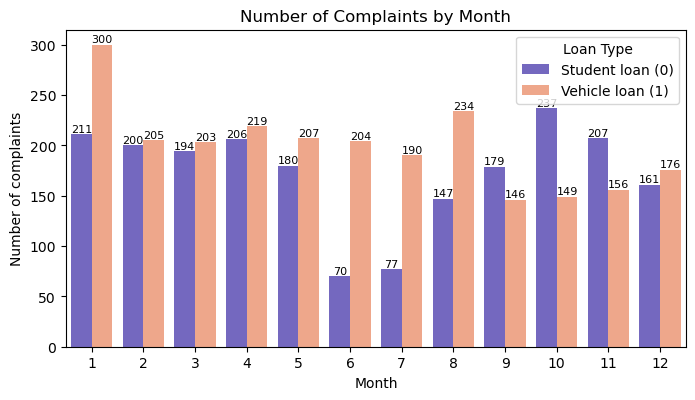

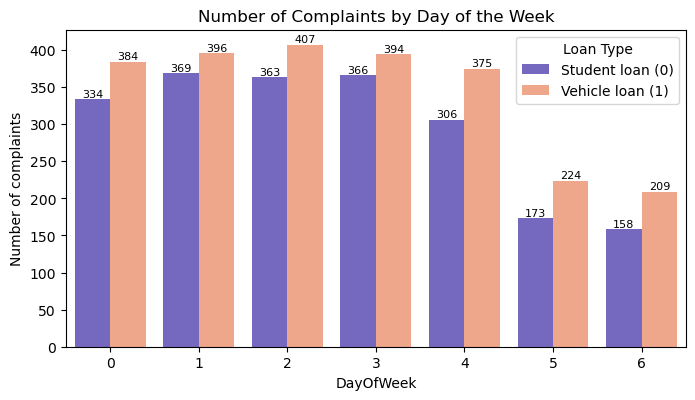

**Interpretation:**
1. Vehicle loan complaints have consistently been higher than student loan complaints in past 3 years except for the present year 2024
2. Student loan complaints were lowest in June and July, while vehicle loan complaints peaked in January.
3. Most complaints are filed on weekdays (0-4), with decrease on the weekends (5-6).

In [134]:
fig = plt.figure(figsize=(8,14))
fig.add_subplot(3, 1, 1)
ax = sns.countplot(data=df2,x='Year',hue='Loan',palette=['#6A5ACD','#FFA07A'])
for container in ax.containers:
    ax.bar_label(container,fontsize=8)
plt.ylabel('Number of complaints')
ax.set_title('Number of Complaints by Year')
ax.legend(title='Loan Type', labels=['Student loan (0)', 'Vehicle loan (1)'])
    
fig = plt.figure(figsize=(8,14))
fig.add_subplot(3, 1, 2)
ax = sns.countplot(data=df2,x='Month',hue='Loan',palette=['#6A5ACD','#FFA07A'])
for container in ax.containers:
    ax.bar_label(container,fontsize=8)
plt.ylabel('Number of complaints')
ax.set_title('Number of Complaints by Month')
ax.legend(title='Loan Type', labels=['Student loan (0)', 'Vehicle loan (1)'])
    
fig = plt.figure(figsize=(8,14))
fig.add_subplot(3, 1, 3)
ax = sns.countplot(data=df2,x='DayOfWeek',hue='Loan',palette=['#6A5ACD','#FFA07A'])
for container in ax.containers:
    ax.bar_label(container,fontsize=8)
plt.ylabel('Number of complaints')
ax.set_title('Number of Complaints by Day of the Week')
ax.legend(title='Loan Type', labels=['Student loan (0)', 'Vehicle loan (1)'])

plt.show()
#0= Student loan , 1= Vehicle

text = """**Interpretation:**
1. Vehicle loan complaints have consistently been higher than student loan complaints in past 3 years except for the present year 2024
2. Student loan complaints were lowest in June and July, while vehicle loan complaints peaked in January.
3. Most complaints are filed on weekdays (0-4), with decrease on the weekends (5-6)."""
display(Markdown(text))

In [135]:
day_loan_count = df2.pivot_table(index='Day', columns='Loan',aggfunc='size',fill_value=0)
day_loan_count['Total'] = day_loan_count.sum(axis=1)
day_loan_count.head()

Loan   0   1  Total
Day                
1     70  77    147
2     68  75    143
3     77  67    144
4     60  70    130
5     63  66    129

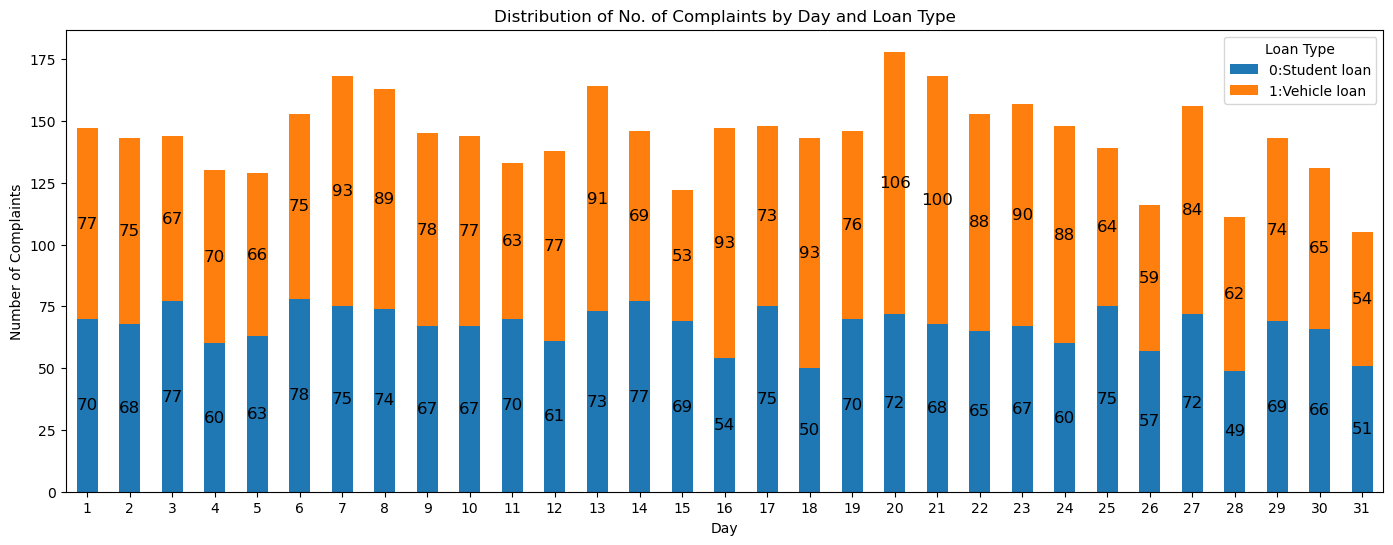

**Interpretation:**
1. There is a noticeable fluctuation in the number of complaints throughout the month, showing a wavy pattern.
2. The 20th day has the highest number of complaints.
3. The 31st of the month has the least number of complaints, which could be because not all months have 31 days, leading to fewer complaints on this day. 

In [136]:
ax = day_loan_count[[0,1]].plot(kind='bar', stacked=True, figsize=(17, 6))
for container in ax.containers:
    ax.bar_label(container, fontsize=12, label_type='center')
plt.title('Distribution of No. of Complaints by Day and Loan Type')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')
ax.legend(title='Loan Type', labels=['0:Student loan', '1:Vehicle loan'])
plt.xticks(rotation=0)
plt.show()
text = """**Interpretation:**
1. There is a noticeable fluctuation in the number of complaints throughout the month, showing a wavy pattern.
2. The 20th day has the highest number of complaints.
3. The 31st of the month has the least number of complaints, which could be because not all months have 31 days, leading to fewer complaints on this day. """
display(Markdown(text))

In [137]:
# Category of the ZIP
def categorize_zip(zip_code):
    if zip_code == 'XXXXX':
        return 'XXXXX'
    elif len(zip_code) == 5 and zip_code.isdigit():
        return '5 digits'
    elif len(zip_code) == 5 and zip_code.endswith('XX'):
        return '3 digits'
    else:
        return 'Other'

df2['ZIP_category'] = df2['ZIP code'].apply(categorize_zip)
zip_code_cat = df2['ZIP_category'].value_counts()

for category, count in zip_code_cat.items():
    print(f"{category}: {count}")

5 digits: 3149
3 digits: 1116
XXXXX: 193


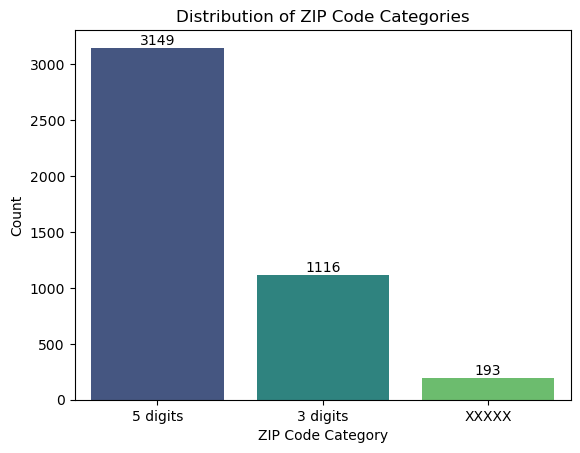

**Interpretation:**
1. 5 digits: Majority of the dataset (49,894 complaints) have full 5-digit ZIP codes
2. 3 digits + XX: Significant portion (8,469 complaints) with 3-digit ZIP codes, reflecting consumer consents to the publication of their complaint narrative and lives in a less populated area.
3. XXXXX: A notable number (1,787 complaints) are fully anonymized, protecting privacy in sparsely populated or non-US regions, limiting detailed analysis.
4. Blank (NaN): A very small portion (35 complaints) is missing ZIP codes, likely due to non-numeric submissions or international addresses

In [138]:
ax = sns.barplot(zip_code_cat,palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of ZIP Code Categories')
plt.xlabel('ZIP Code Category')
plt.ylabel('Count')
plt.show()
text = """**Interpretation:**
1. 5 digits: Majority of the dataset (49,894 complaints) have full 5-digit ZIP codes
2. 3 digits + XX: Significant portion (8,469 complaints) with 3-digit ZIP codes, reflecting consumer consents to the publication of their complaint narrative and lives in a less populated area.
3. XXXXX: A notable number (1,787 complaints) are fully anonymized, protecting privacy in sparsely populated or non-US regions, limiting detailed analysis.
4. Blank (NaN): A very small portion (35 complaints) is missing ZIP codes, likely due to non-numeric submissions or international addresses"""
display(Markdown(text))

### Correlation map

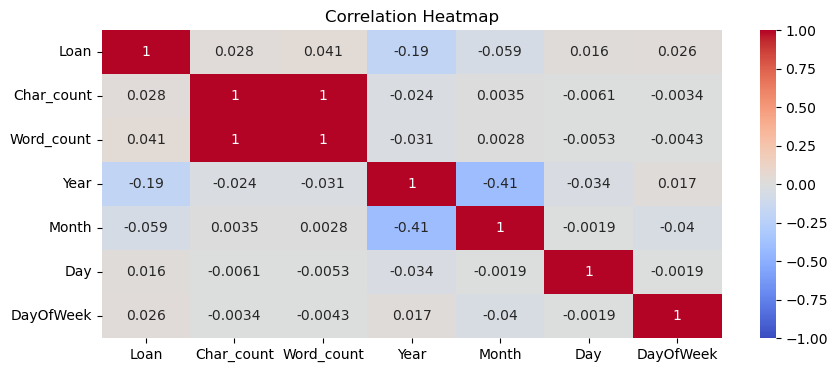

 **Interpretation:**
1. Char_count and Word_count are perfectly correlated (correlation of 1), indicating that the number of characters is directly proportional to the number of words in the complaint narratives. This suggests that these features might be redundant.
2. Year and Month have a moderate negative correlation (-0.41), suggesting that complaints are spread across different months over the years.
3. Most of the correlations between features are very weak, indicating that there is no strong linear relationship between most pairs of features.

In [139]:
plt.figure(figsize=(10,4))
sns.heatmap(df2.corr(numeric_only = True),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
text=""" **Interpretation:**
1. Char_count and Word_count are perfectly correlated (correlation of 1), indicating that the number of characters is directly proportional to the number of words in the complaint narratives. This suggests that these features might be redundant.
2. Year and Month have a moderate negative correlation (-0.41), suggesting that complaints are spread across different months over the years.
3. Most of the correlations between features are very weak, indicating that there is no strong linear relationship between most pairs of features."""
display(Markdown(text))

In [140]:
## Dropping 'Char_count' feature to remove redundant features
df2.drop(['Char_count'],axis=1,inplace=True)

In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4458 non-null   datetime64[ns]
 1   State                4458 non-null   object        
 2   ZIP code             4458 non-null   object        
 3   Loan                 4458 non-null   int32         
 4   Complaint_narrative  4458 non-null   object        
 5   Word_count           4458 non-null   int64         
 6   Year                 4458 non-null   int32         
 7   Month                4458 non-null   int32         
 8   Day                  4458 non-null   int32         
 9   DayOfWeek            4458 non-null   int32         
 10  ZIP_category         4458 non-null   object        
dtypes: datetime64[ns](1), int32(5), int64(1), object(4)
memory usage: 296.2+ KB


### Encoding the features - df2

In [142]:
ohe = OneHotEncoder(sparse_output = False)

In [143]:
zip_state_encoded = ohe.fit_transform(df2[['ZIP_category','State','ZIP code']])
zip_state_encoded_df = pd.DataFrame(zip_state_encoded, columns=ohe.get_feature_names_out(['ZIP_category','State','ZIP code']))
zip_state_encoded_df

ZIP_category_3 digits  ZIP_category_5 digits  ZIP_category_XXXXX  \
0                       0.0                    1.0                 0.0   
1                       0.0                    1.0                 0.0   
2                       0.0                    1.0                 0.0   
3                       0.0                    1.0                 0.0   
4                       0.0                    1.0                 0.0   
...                     ...                    ...                 ...   
4453                    0.0                    1.0                 0.0   
4454                    0.0                    1.0                 0.0   
4455                    1.0                    0.0                 0.0   
4456                    0.0                    1.0                 0.0   
4457                    0.0                    1.0                 0.0   

      State_AK  State_AL  State_AP  State_AR  State_AZ  State_CA  State_CO  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
4453       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4454       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4455       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4456       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4457       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      ...  ZIP code_99208  ZIP code_99224  ZIP code_99301  ZIP code_993XX  \
0     ...             0.0             0.0             0.0             0.0   
1     ...             0.0             0.0             0.0             0.0   
2     ...             0.0             0.0             0.0             0.0   
3     ...             0.0             0.0             0.0             0.0   
4     ...             0.0             0.0             0.0             0.0   
...   ...             ...             ...             ...             ...   
4453  ...             0.0             0.0             0.0             0.0   
4454  ...             0.0             0.0             0.0             0.0   
4455  ...             0.0             0.0             0.0             0.0   
4456  ...             0.0             0.0             0.0             0.0   
4457  ...             0.0             0.0             0.0             0.0   

      ZIP code_995XX  ZIP code_99645  ZIP code_996XX  ZIP code_997XX  \
0                0.0             0.0             0.0             0.0   
1                0.0             0.0             0.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
4453             0.0             0.0             0.0             0.0   
4454             0.0             0.0             0.0             0.0   
4455             0.0             0.0             0.0             0.0   
4456             0.0             0.0             0.0             0.0   
4457             0.0             0.0             0.0             0.0   

      ZIP code_99801  ZIP code_XXXXX  
0                0.0             0.0  
1                0.0             0.0  
2                0.0             0.0  
3                0.0             0.0  
4                0.0             0.0  
...              ...             ...  
4453             0.0             0.0  
4454             0.0             0.0  
4455             0.0             0.0  


In [144]:
#Dropping the encoded features
df2 = pd.concat([df2, zip_state_encoded_df], axis=1)
df2.drop(['ZIP_category', 'Date','State','ZIP code'], axis=1, inplace=True)

In [145]:
df2.head(2)

Loan                                Complaint_narrative  Word_count  Year  \
0     1  filed bankruptcy capital one listed bankruptcy...         133  2022   
1     0  accordance fair credit reporting act account c...          24  2024   

   Month  Day  DayOfWeek  ZIP_category_3 digits  ZIP_category_5 digits  \
0      5    5          3                    0.0                    1.0   
1      3    6          2                    0.0                    1.0   

   ZIP_category_XXXXX  ...  ZIP code_99208  ZIP code_99224  ZIP code_99301  \
0                 0.0  ...             0.0             0.0             0.0   
1                 0.0  ...             0.0             0.0             0.0   

   ZIP code_993XX  ZIP code_995XX  ZIP code_99645  ZIP code_996XX  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   

   ZIP code_997XX  ZIP code_99801  ZIP code_XXXXX  
0             0.0             0.0             0.0  
1             0.0             0.0             0.0  

[2 rows x 2691 columns]

In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Columns: 2691 entries, Loan to ZIP code_XXXXX
dtypes: float64(2684), int32(5), int64(1), object(1)
memory usage: 91.4+ MB


### Text Vectorization

In [147]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_features = tfidf_vectorizer.fit_transform(df2['Complaint_narrative'])
tfidf_features = tfidf_features.toarray()
tfidf_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.08191487, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03105153, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Splitting the data

In [148]:
numerical_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'Loan']
print(numerical_columns)

['Word_count', 'Year', 'Month', 'Day', 'DayOfWeek', 'ZIP_category_3 digits', 'ZIP_category_5 digits', 'ZIP_category_XXXXX', 'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_PR', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 'ZIP code_00667', 'ZIP code_00754', 'ZIP code_007XX', 'ZIP code_00926', 'ZIP code_00956', 'ZIP code_01089', 'ZIP code_010XX', 'ZIP code_01109', 'ZIP code_011XX', 'ZIP code_01201', 'ZIP code_012XX', 'ZIP code_013XX', 'ZIP code_01

In [149]:
numerical_features = df2[numerical_columns].values

In [150]:
X = np.concatenate((numerical_features, tfidf_features),axis=1)
y = df2['Loan']

In [151]:
print(f"Labels = {pd.unique(y)}")
print(f"Total records = {len(X)}")

Labels = [1 0]
Total records = 4458


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
print(f"Total training records = {len(X_train)}")
print(f"Total testing records = {len(X_test)}")

Total training records = 3343
Total testing records = 1115


## Logistic Regression - df2

In [153]:
lr=LogisticRegression()
lr.fit(X_train, y_train)  

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print()
print("Accuracy: ",accuracy_score(y_test,y_pred))
print()
print("Precision: ",precision_score(y_test,y_pred))
print()
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred))
print()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       528
           1       0.88      0.92      0.90       587

    accuracy                           0.90      1115
   macro avg       0.90      0.89      0.89      1115
weighted avg       0.90      0.90      0.89      1115


Accuracy:  0.895067264573991

Precision:  0.8827361563517915

Confusion Matrix: 
 [[456  72]
 [ 45 542]]

AUC: 0.9616017500387177


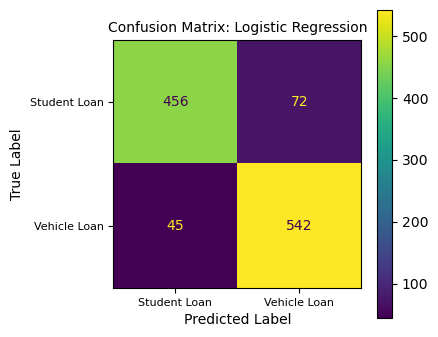

In [154]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(4, 4)) 
disp.plot(ax=ax)
ax.set_xticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_yticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_title('Confusion Matrix: Logistic Regression', fontsize=10)
ax.set_xlabel('Predicted Label', fontsize=10)
ax.set_ylabel('True Label', fontsize=10)
plt.show()

## Random Forest - df2

In [155]:
rfc = RandomForestClassifier(n_estimators=50, random_state=10)
rfc.fit(X_train,y_train)

y_pred1 = rfc.predict(X_test)
y_prob1 = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred1))
print()
print("Accuracy: ",accuracy_score(y_test,y_pred1))
print()
print("Precision: ",precision_score(y_test,y_pred1))
print()
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred1))
print()


fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       528
           1       0.94      0.99      0.96       587

    accuracy                           0.96      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115


Accuracy:  0.9614349775784753

Precision:  0.9415584415584416

Confusion Matrix: 
 [[492  36]
 [  7 580]]

AUC: 0.9940100536885034


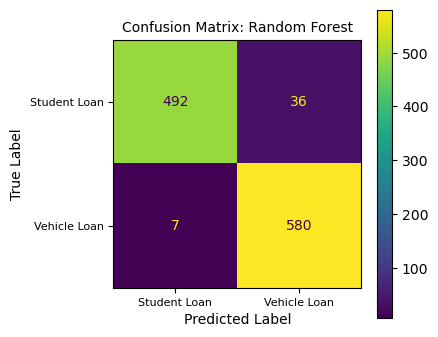

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred1))
fig, ax = plt.subplots(figsize=(4, 4)) 
disp.plot(ax=ax)
ax.set_xticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_yticklabels(['Student Loan', 'Vehicle Loan'], fontsize=8)
ax.set_title('Confusion Matrix: Random Forest', fontsize=10)
ax.set_xlabel('Predicted Label', fontsize=10)
ax.set_ylabel('True Label', fontsize=10)
plt.show()

In [157]:
y_pred_lr = lr.predict(X_test) # Logistic Regression Predictions
y_pred_rf = rfc.predict(X_test) # Random Forest Predictions 
indices_train, indices_test = train_test_split(np.arange(len(df2)), random_state=10)
batch_df = df2.iloc[indices_test].reset_index(drop=True)

In [158]:
batch_df['Actual Loan'] = y_test.values
batch_df['Pred Loan (LR)'] = y_pred_lr
batch_df['Pred Loan (RF)'] = y_pred_rf

result_df = batch_df[['Complaint_narrative', 'Actual Loan', 'Pred Loan (LR)', 'Pred Loan (RF)']]
result_df

Complaint_narrative  Actual Loan  \
0     paying car note time apr late balance budging ...            1   
1     vehicle loan well fargo hurricane well fargo s...            1   
2     going separation financial hardship related ma...            1   
3     purchased car located car financed threw credi...            1   
4     recently announced offer student loan forgiven...            0   
...                                                 ...          ...   
1110  account company year making payment year loan ...            0   
1111  nelnet sending email invoice however make paym...            0   
1112  currently graduate school past year applied de...            0   
1113  hi hopeful help deal ridiculous incompetence m...            0   
1114  multiple student loan credit report closed pai...            0   

      Pred Loan (LR)  Pred Loan (RF)  
0                  1               1  
1                  1               1  
2                  0               1  
3                  1               1  
4                  0               0  
...              ...             ...  
1110               1               0  
1111               0               1  
1112               0               0  
1113               1               0  
1114               0               0  

[1115 rows x 4 columns]

**Interpretation of Model Performance with Engineered Features:**

1. **Logistic Regression:**
    - Accuracy: 89.51%
    - Precision: 88.27%
    - Confusion Matrix:
           - True Positives (TP): 542 (correctly identified vehicle loans)
           - False Positives (FP): 72 (student loans incorrectly identified as vehicle loans)
           - True Negatives (TN): 456 (correctly identified student loans)
           - False Negatives (FN): 45 (vehicle loans incorrectly identified as student loans)
    - Recall: This indicates that the model correctly identifies 86% of actual student loan complaints and 92% of actual vehicle loan complaints.
    - F1-Score: The F1-score for class 1 is 90%, which balances the precision and recall.
    - AUC: The Area Under the ROC Curve (AUC) is 0.961, indicating excellent model performance in distinguishing between the two classes.
    
    
2. **Random Forest Classifier (RFC):**
    - Accuracy: 96.14%
    - Precision: 94.15%
    - Confusion Matrix:
           - True Positives (TP): 580 (correctly identified vehicle loans)
           - False Positives (FP): 36 (student loans incorrectly identified as vehicle loans)
           - True Negatives (TN): 492 (correctly identified student loans)
           - False Negatives (FN): 7 (vehicle loans incorrectly identified as student loans)
    - Recall: This indicates that the model correctly identifies 93% of actual student loan complaints and 99% of actual vehicle loan complaints.
    - F1-Score: The F1-score for class 1 is 96%, which balances the precision and recall.
    - AUC:  The Area Under the ROC Curve (AUC) is 0.994, indicating excellent model performance in distinguishing between the two classes.
    
3. **Analysis:**
Both models perform well with feature engineering, but Random Forest provides slightly better overall performance. 

**Comparison of Models with Basic Features and Engineered Features:**

1. **Logistic Regression:**
    - Accuracy: Decreased from 94.34% to 89.51% with feature engineering.
    - Precision: Decreased from 94.03% to 88.27%.
    - Recall: Slightly increased from 96.23% to 92.31%.
    - Confusion Matrix:
           - The number of false positives increased from 37 to 72.
           - The number of false negatives increased from 26 to 45.
    - AUC: Decreased from 0.9844 to 0.9616.
    
2. **Random Forest Classifier (RFC):**
    - Accuracy: Slightly improved from 96.68% to 96.77%.
    - Precision: Decreased slightly from 96.88% to 95.69%.
    - Recall: Remained high for both classes, with minor improvements.
    - Confusion Matrix:
           - The number of false positives increased from 24 to 36.
           - The number of false negatives decreased from 17 to 7.
    - AUC: Slightly decreased from 0.9953 to 0.9940.
    
3. **Conclusion:**
    - Feature engineering had a mixed impact on the model performance.
    - While Logistic Regression experienced a decrease in performance metrics with feature engineering, the Random Forest model maintained high performance with only slight variations.
    - Random Forest consistently outperformed Logistic Regression in both cases, making it the better model for this classification task.

In [159]:
# Performance metrics for models without feature engineering
metrics_no_fe = {
    'Model': ['Logistic Regression (No FE)', 'Random Forest (No FE)'],
    'Accuracy': [94.35, 96.32],
    'Precision': [94.03, 96.10],
    'Recall': [96.23, 97.04],
    'F1 Score': [94.90, 96.57],
    'AUC': [0.9844, 0.9953]
}

# Performance metrics for models with feature engineering
metrics_fe = {
    'Model': ['Logistic Regression (FE)', 'Random Forest (FE)'],
    'Accuracy': [89.51, 96.14],
    'Precision': [88.27, 94.15],
    'Recall': [92.31, 98.81],
    'F1 Score': [90.25, 96.33],
    'AUC': [0.9616, 0.9940]
}


df_no_fe = pd.DataFrame(metrics_no_fe)
df_fe = pd.DataFrame(metrics_fe)
df_performance = pd.concat([df_no_fe, df_fe], ignore_index=True)
df_performance

Model  Accuracy  Precision  Recall  F1 Score     AUC
0  Logistic Regression (No FE)     94.35      94.03   96.23     94.90  0.9844
1        Random Forest (No FE)     96.32      96.10   97.04     96.57  0.9953
2     Logistic Regression (FE)     89.51      88.27   92.31     90.25  0.9616
3           Random Forest (FE)     96.14      94.15   98.81     96.33  0.9940